# Análisis exploratorio del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv('/content/fraud.csv')
print(data.shape)
data.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [ ]:
# Análisis por tipo de variable
dtypes_count = data.dtypes.value_counts()
missing_counts = data.isnull().sum()
unique_counts = data.nunique()
print(tabulate(dtypes_count.items(), headers=['Tipo de Variable', 'Cantidad'], tablefmt='grid'))
print(tabulate(missing_counts.items(), headers=['Variable', 'Valores Faltantes'], tablefmt='grid'))
print(tabulate(unique_counts.items(), headers=['Variable', 'Valores Únicos'], tablefmt='grid'))

+--------------------+------------+
| Tipo de Variable   |   Cantidad |
+====================+============+
| object             |         25 |
+--------------------+------------+
| int64              |          8 |
+--------------------+------------+
+----------------------+---------------------+
| Variable             |   Valores Faltantes |
+======================+=====================+
| Month                |                   0 |
+----------------------+---------------------+
| WeekOfMonth          |                   0 |
+----------------------+---------------------+
| DayOfWeek            |                   0 |
+----------------------+---------------------+
| Make                 |                   0 |
+----------------------+---------------------+
| AccidentArea         |                   0 |
+----------------------+---------------------+
| DayOfWeekClaimed     |                   0 |
+----------------------+---------------------+
| MonthClaimed         |                   

Conclusión: No existe presencia de valores faltantes, la mayoría de las columnas son categóricas. Muchas de esas variables necesitarán codificación antes del modelado.

In [ ]:
#Mostrar distribuciones de las variables cualitativas
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


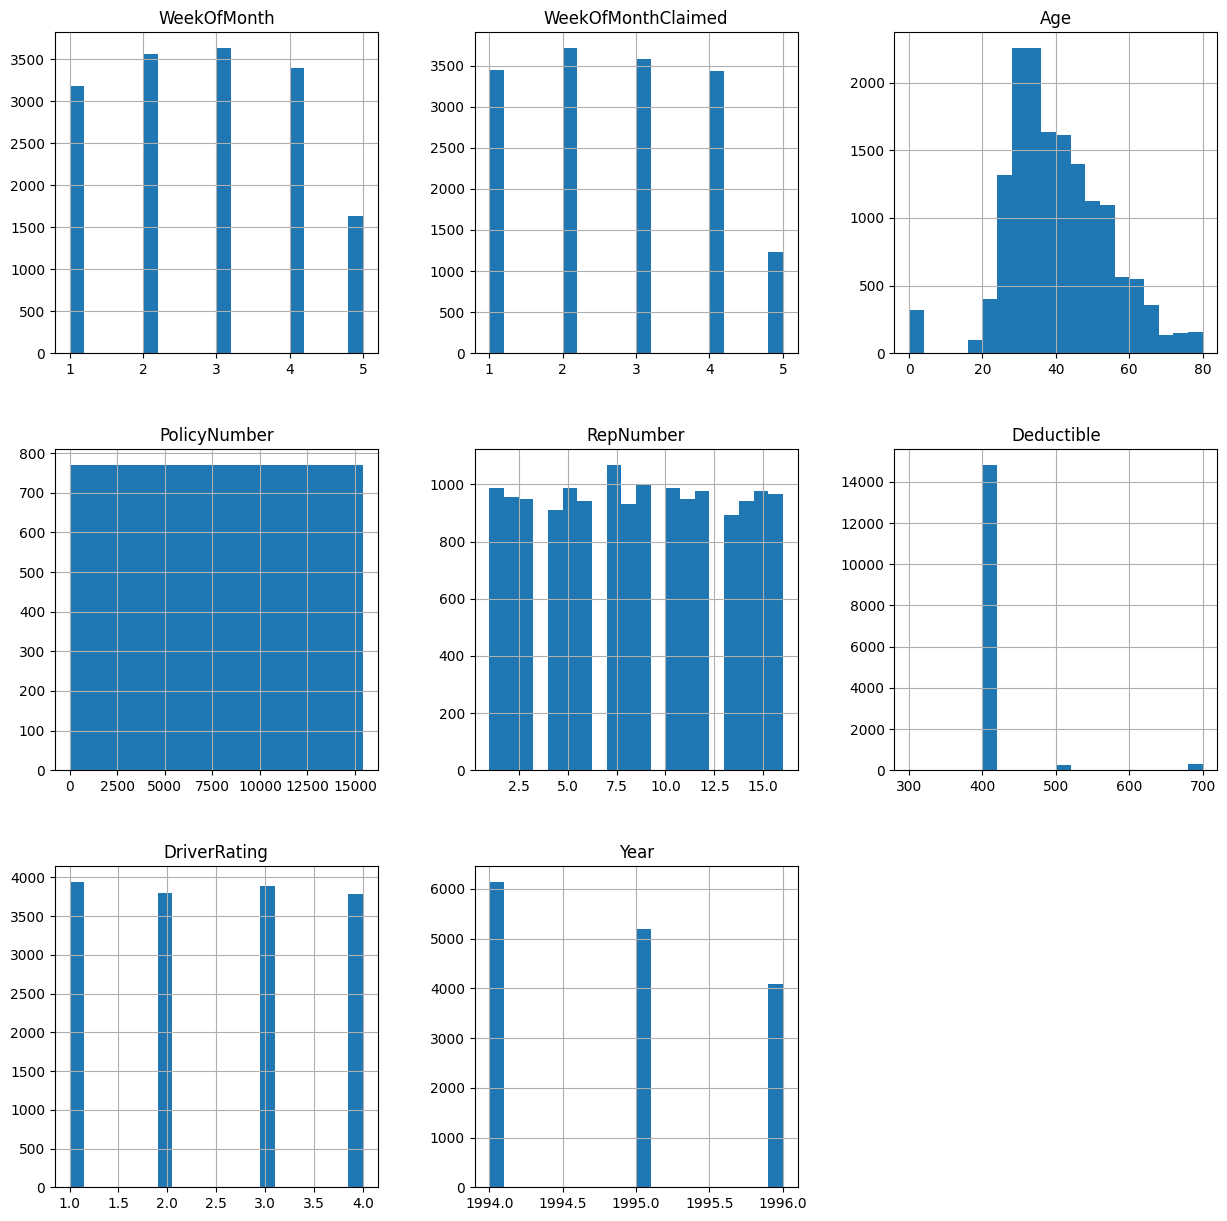

In [ ]:
#Histogramas
data.hist(bins=20, figsize=(15,15))
plt.show()

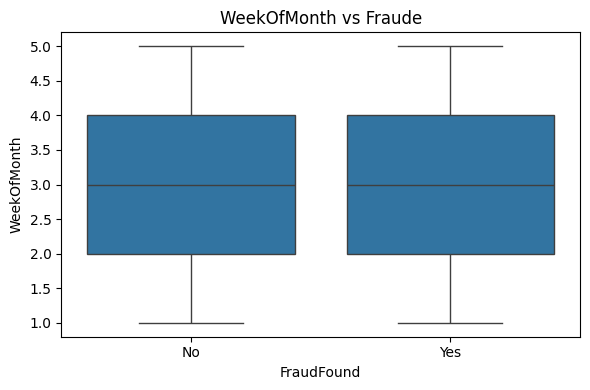

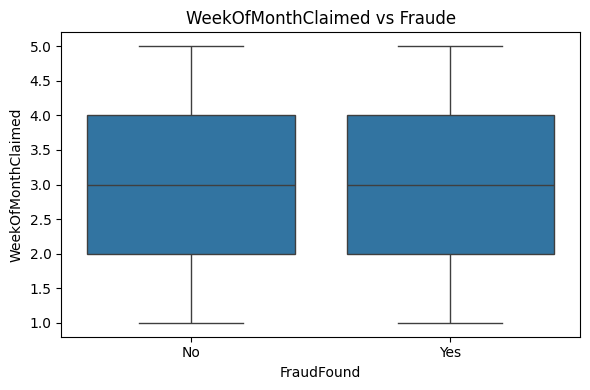

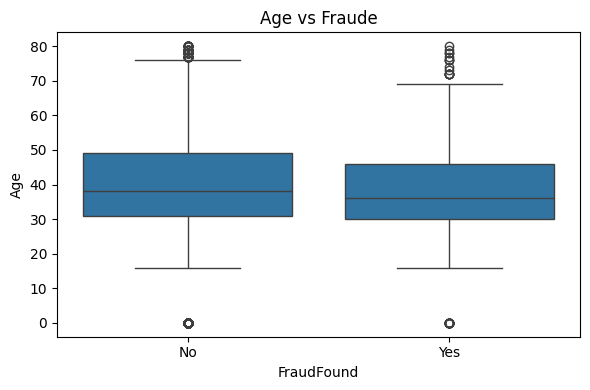

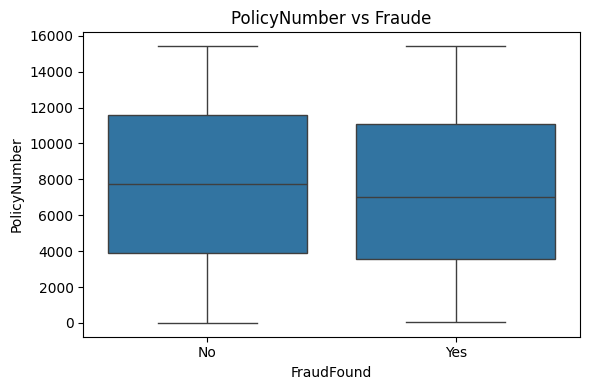

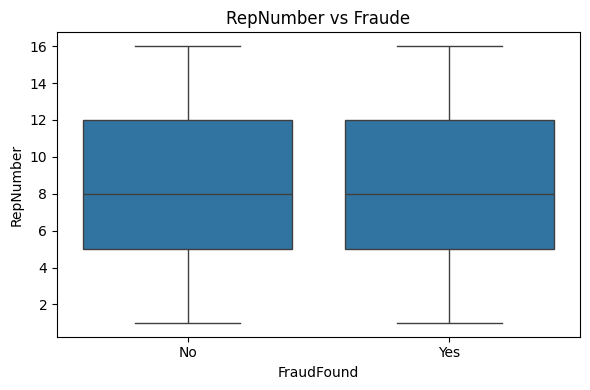

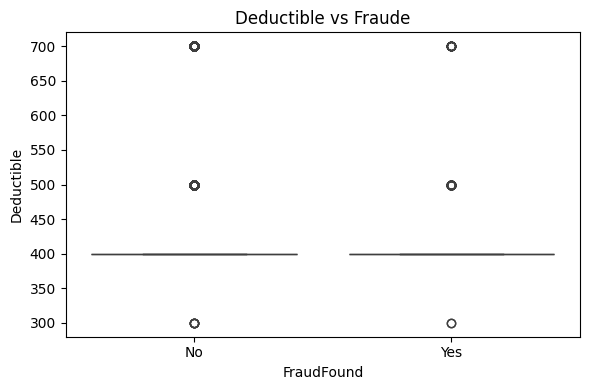

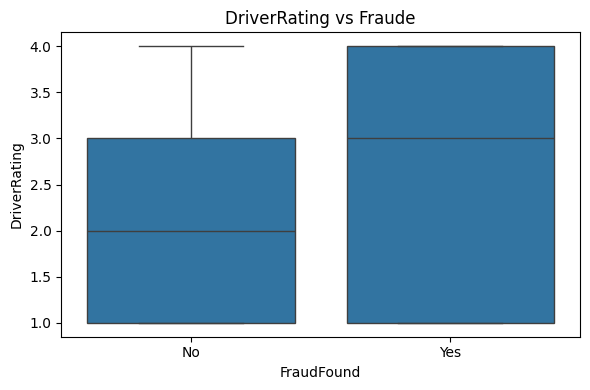

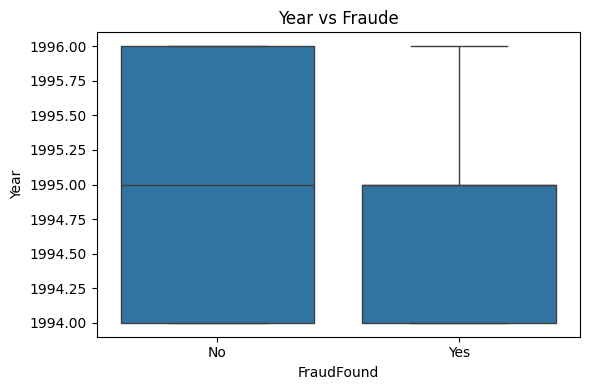

In [ ]:
# Seleccionamos columnas numéricas (no categóricas)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Graficamos boxplots para todas las variables numéricas
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='FraudFound', y=col)
    plt.title(f'{col} vs Fraude')
    plt.tight_layout()
    plt.show()


In [ ]:
#Mostrar distribuciones de las variables cuanlitativas
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  value_counts = data[column].value_counts()
  percentage = (value_counts / len(data)) * 100
  df_counts = pd.concat([value_counts, percentage.round(1)], axis=1)
  df_counts.columns = ['Count', 'Percentage']
  print(df_counts)


Variable: Month
       Count  Percentage
Month                   
Jan     1411         9.2
May     1367         8.9
Mar     1360         8.8
Jun     1321         8.6
Oct     1305         8.5
Dec     1285         8.3
Apr     1280         8.3
Feb     1266         8.2
Jul     1257         8.2
Sep     1240         8.0
Nov     1201         7.8
Aug     1127         7.3

Variable: DayOfWeek
           Count  Percentage
DayOfWeek                   
Monday      2616        17.0
Friday      2445        15.9
Tuesday     2300        14.9
Thursday    2173        14.1
Wednesday   2159        14.0
Saturday    1982        12.9
Sunday      1745        11.3

Variable: Make
           Count  Percentage
Make                        
Pontiac     3837        24.9
Toyota      3121        20.2
Honda       2801        18.2
Mazda       2354        15.3
Chevrolet   1681        10.9
Accura       472         3.1
Ford         450         2.9
VW           283         1.8
Dodge        109         0.7
Saab         108

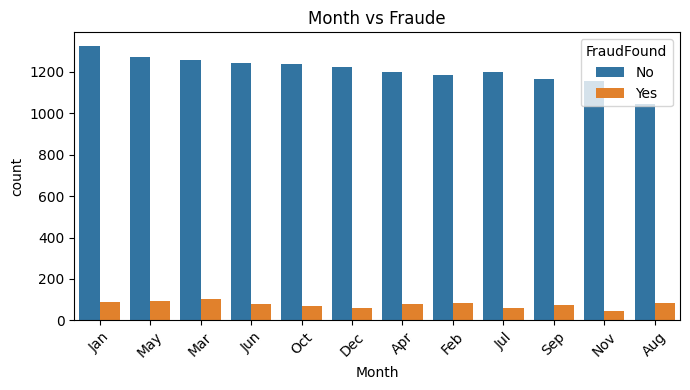

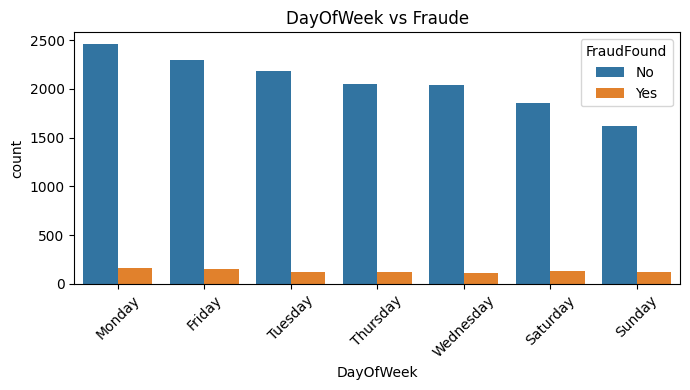

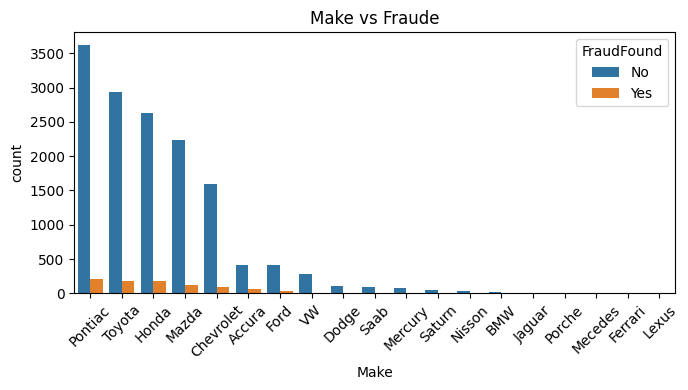

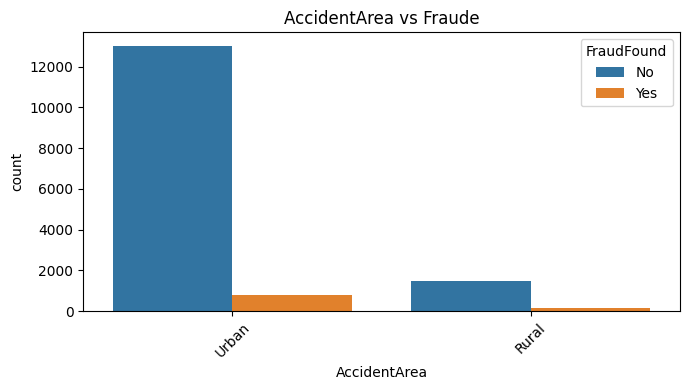

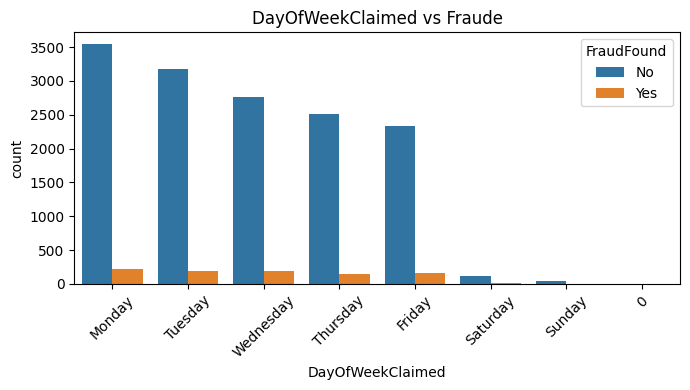

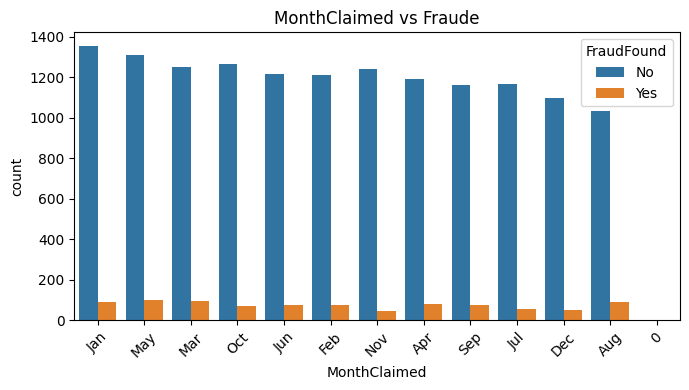

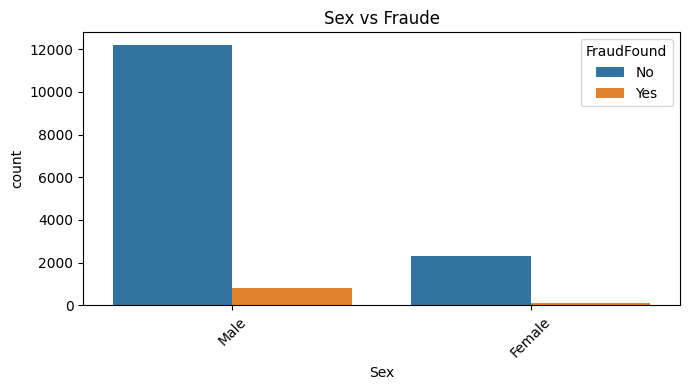

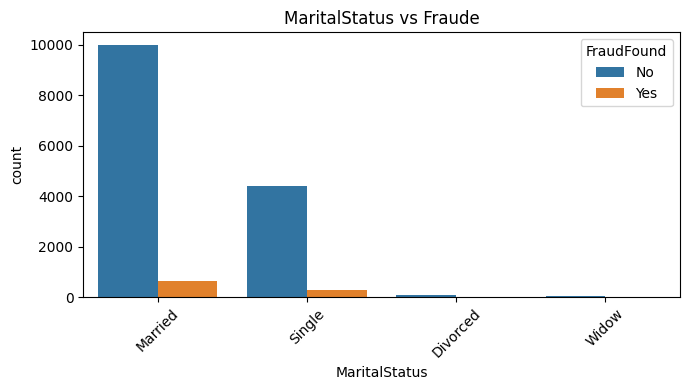

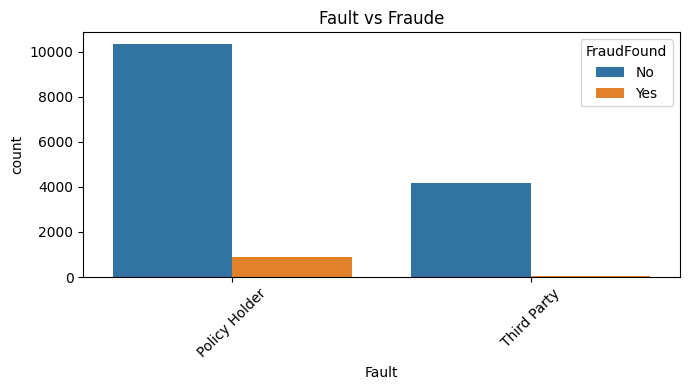

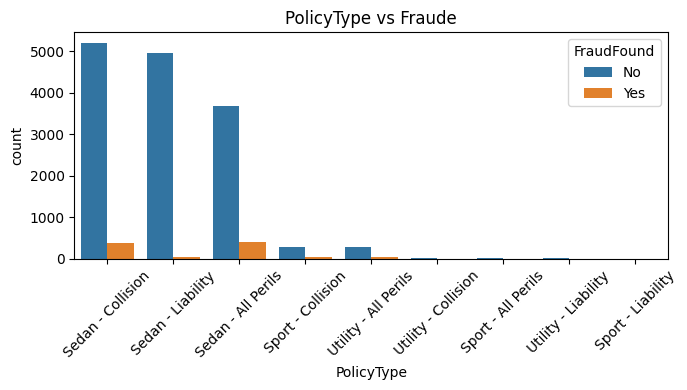

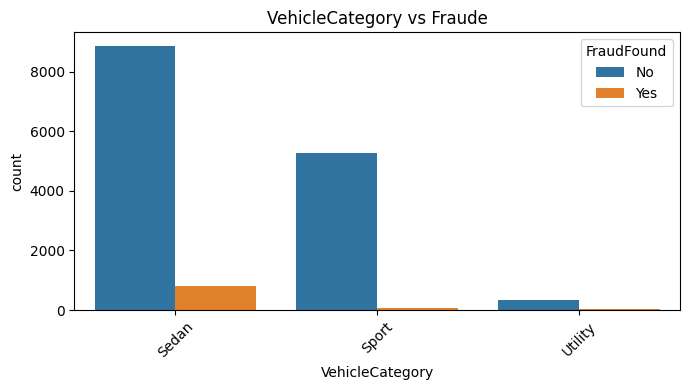

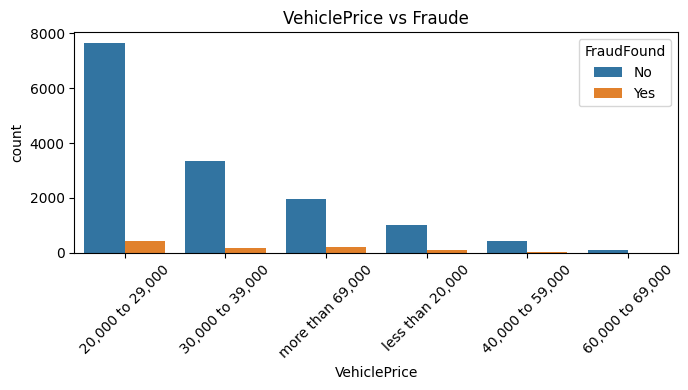

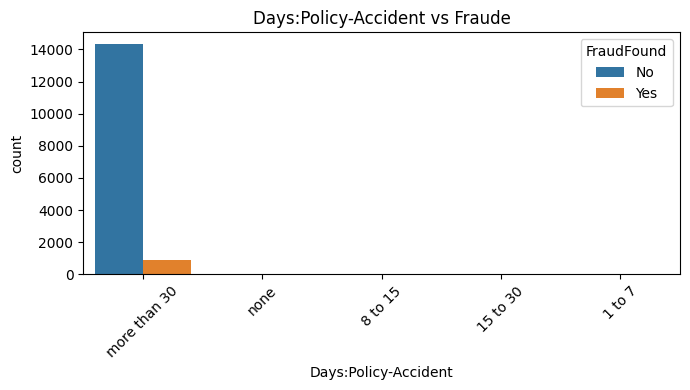

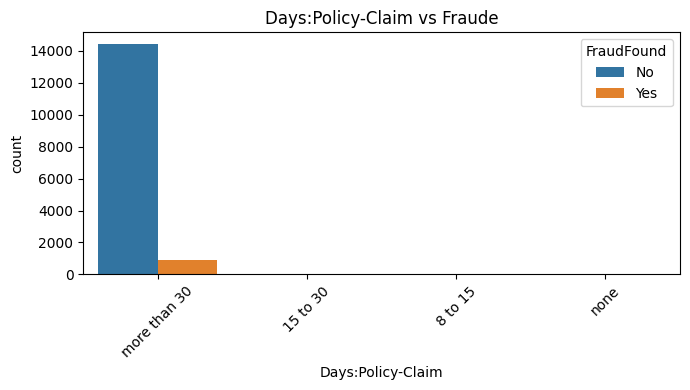

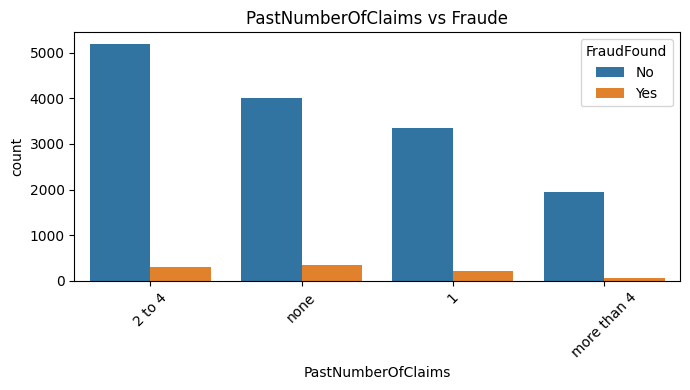

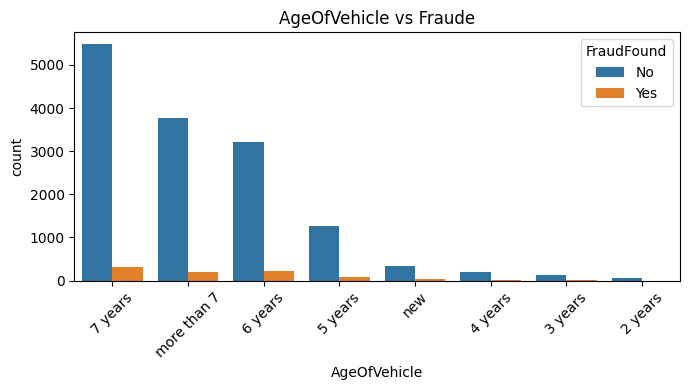

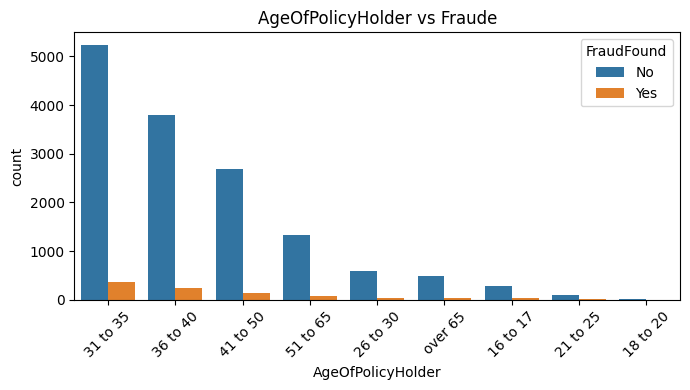

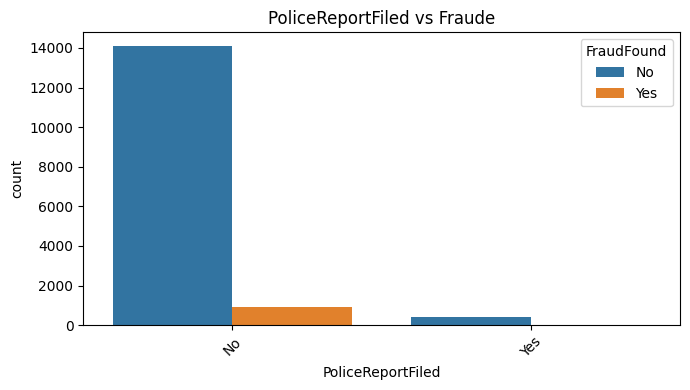

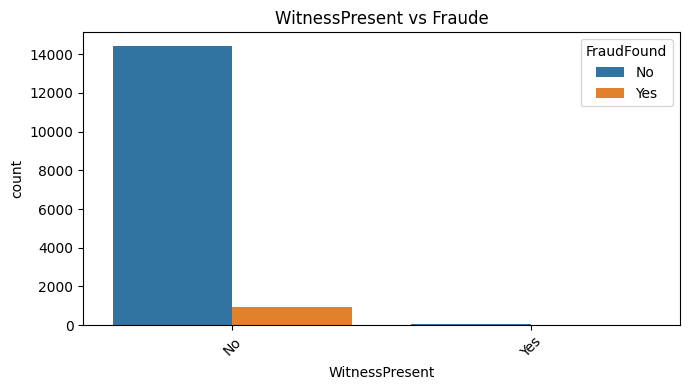

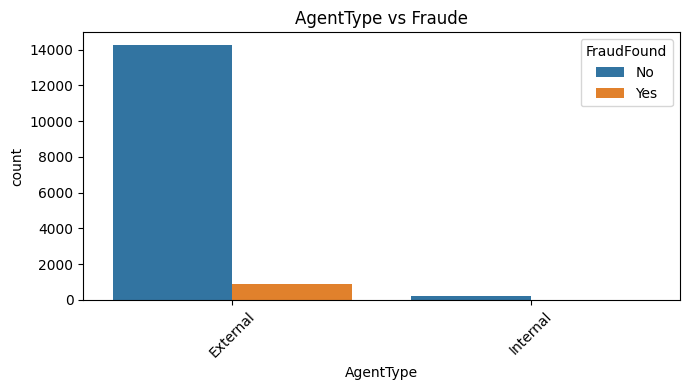

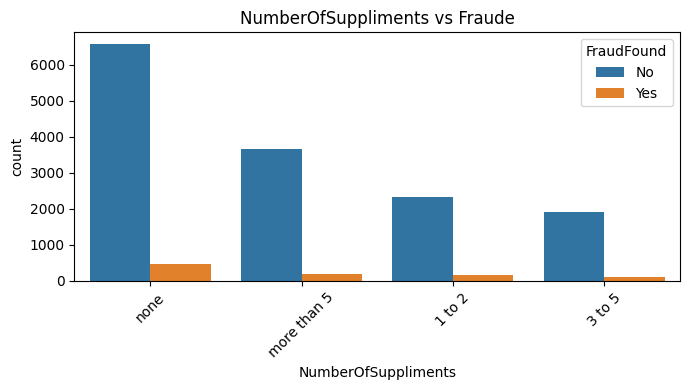

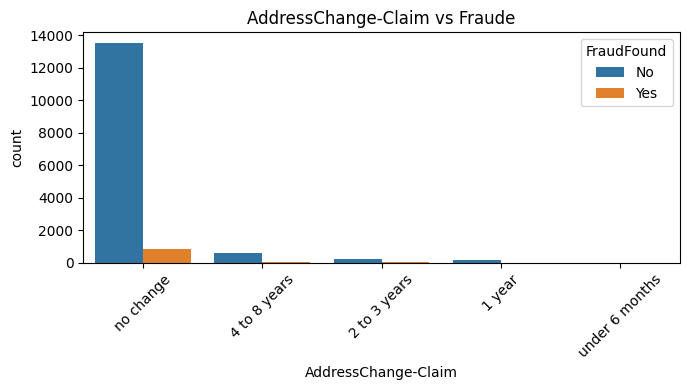

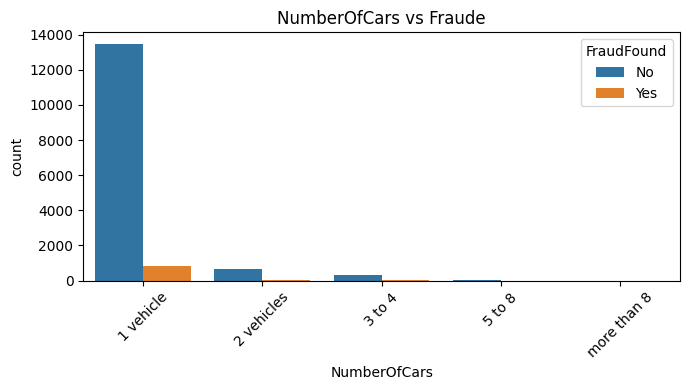

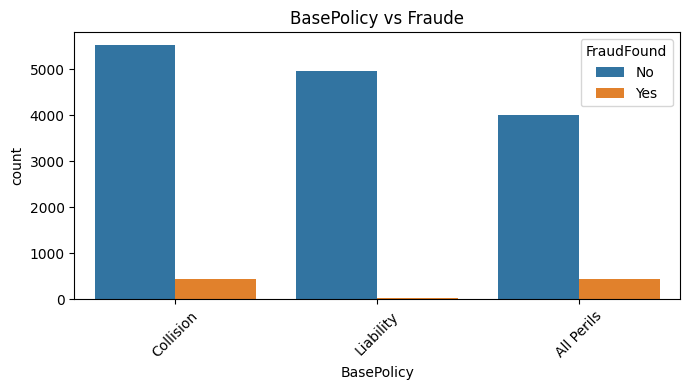

In [ ]:
# Identificar columnas categóricas (excepto el target)
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('FraudFound')

# Graficar cada variable categórica vs fraude
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=data, x=col, hue='FraudFound', order=data[col].value_counts().index)
    plt.title(f"{col} vs Fraude")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    ct = pd.crosstab(data[col], data['FraudFound'], normalize='index') * 100
    print(f"Cross-tab {col} vs. FraudeDetectado (% por fila):")
    display(ct.round(2))

Cross-tab Month vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
Month,,
Apr,93.75,6.25
Aug,92.55,7.45
Dec,95.18,4.82
Feb,93.52,6.48
Jan,93.83,6.17
Jul,95.23,4.77
Jun,93.94,6.06
Mar,92.50,7.50
May,93.12,6.88


Cross-tab DayOfWeek vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
DayOfWeek,,
Friday,93.70,6.30
Monday,93.88,6.12
Saturday,93.34,6.66
Sunday,93.01,6.99
Thursday,94.48,5.52
Tuesday,94.78,5.22
Wednesday,94.67,5.33


Cross-tab Make vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
Make,,
Accura,87.50,12.50
BMW,93.33,6.67
Chevrolet,94.41,5.59
Dodge,98.17,1.83
Ferrari,100.00,0.00
Ford,92.67,7.33
Honda,93.61,6.39
Jaguar,100.00,0.00
Lexus,100.00,0.00


Cross-tab AccidentArea vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
AccidentArea,,
Rural,91.68,8.32
Urban,94.28,5.72


Cross-tab DayOfWeekClaimed vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
DayOfWeekClaimed,,
0,100.00,0.00
Friday,93.43,6.57
Monday,94.25,5.75
Saturday,92.13,7.87
Sunday,94.23,5.77
Thursday,94.59,5.41
Tuesday,94.13,5.87
Wednesday,93.63,6.37


Cross-tab MonthClaimed vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
MonthClaimed,,
0,100.00,0.00
Apr,93.55,6.45
Aug,91.83,8.17
Dec,95.72,4.28
Feb,93.94,6.06
Jan,93.64,6.36
Jul,95.43,4.57
Jun,93.97,6.03
Mar,92.80,7.20


Cross-tab Sex vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
Sex,,
Female,95.66,4.34
Male,93.71,6.29


Cross-tab MaritalStatus vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
MaritalStatus,,
Divorced,96.05,3.95
Married,93.99,6.01
Single,94.06,5.94
Widow,91.43,8.57


Cross-tab Fault vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
Fault,,
Policy Holder,92.11,7.89
Third Party,99.12,0.88


Cross-tab PolicyType vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
PolicyType,,
Sedan - All Perils,89.94,10.06
Sedan - Collision,93.12,6.88
Sedan - Liability,99.28,0.72
Sport - All Perils,100.00,0.00
Sport - Collision,86.21,13.79
Sport - Liability,100.00,0.00
Utility - All Perils,87.94,12.06
Utility - Collision,90.00,10.00
Utility - Liability,100.00,0.00


Cross-tab VehicleCategory vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
VehicleCategory,,
Sedan,91.78,8.22
Sport,98.43,1.57
Utility,88.75,11.25


Cross-tab VehiclePrice vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
VehiclePrice,,
"20,000 to 29,000",94.79,5.21
"30,000 to 39,000",95.05,4.95
"40,000 to 59,000",93.28,6.72
"60,000 to 69,000",95.40,4.60
"less than 20,000",90.60,9.40
"more than 69,000",91.27,8.73


Cross-tab Days:Policy-Accident vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
Days:Policy-Accident,,
1 to 7,92.86,7.14
15 to 30,93.88,6.12
8 to 15,90.91,9.09
more than 30,94.06,5.94
none,83.64,16.36


Cross-tab Days:Policy-Claim vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
Days:Policy-Claim,,
15 to 30,89.29,10.71
8 to 15,85.71,14.29
more than 30,94.04,5.96
none,100.00,0.00


Cross-tab PastNumberOfClaims vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
PastNumberOfClaims,,
1,93.79,6.21
2 to 4,94.64,5.36
more than 4,96.62,3.38
none,92.21,7.79


Cross-tab AgeOfVehicle vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
AgeOfVehicle,,
2 years,95.89,4.11
3 years,91.45,8.55
4 years,90.83,9.17
5 years,93.00,7.00
6 years,93.39,6.61
7 years,94.40,5.60
more than 7,94.83,5.17
new,91.42,8.58


Cross-tab AgeOfPolicyHolder vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
AgeOfPolicyHolder,,
16 to 17,90.31,9.69
18 to 20,86.67,13.33
21 to 25,85.19,14.81
26 to 30,94.62,5.38
31 to 35,93.56,6.44
36 to 40,94.14,5.86
41 to 50,94.91,5.09
51 to 65,94.97,5.03
over 65,94.09,5.91


Cross-tab PoliceReportFiled vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
PoliceReportFiled,,
No,93.95,6.05
Yes,96.26,3.74


Cross-tab WitnessPresent vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
WitnessPresent,,
No,94.00,6.00
Yes,96.55,3.45


Cross-tab AgentType vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
AgentType,,
External,93.95,6.05
Internal,98.34,1.66


Cross-tab NumberOfSuppliments vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
NumberOfSuppliments,,
1 to 2,93.61,6.39
3 to 5,95.19,4.81
more than 5,94.96,5.04
none,93.30,6.70


Cross-tab AddressChange-Claim vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
AddressChange-Claim,,
1 year,93.53,6.47
2 to 3 years,82.47,17.53
4 to 8 years,94.77,5.23
no change,94.24,5.76
under 6 months,25.00,75.00


Cross-tab NumberOfCars vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
NumberOfCars,,
1 vehicle,94.06,5.94
2 vehicles,93.94,6.06
3 to 4,92.20,7.80
5 to 8,95.24,4.76
more than 8,100.00,0.00


Cross-tab BasePolicy vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
BasePolicy,,
All Perils,89.84,10.16
Collision,92.70,7.30
Liability,99.28,0.72


Cross-tab FraudFound vs. FraudeDetectado (% por fila):


FraudFound,No,Yes
FraudFound,,
No,100.0,0.0
Yes,0.0,100.0


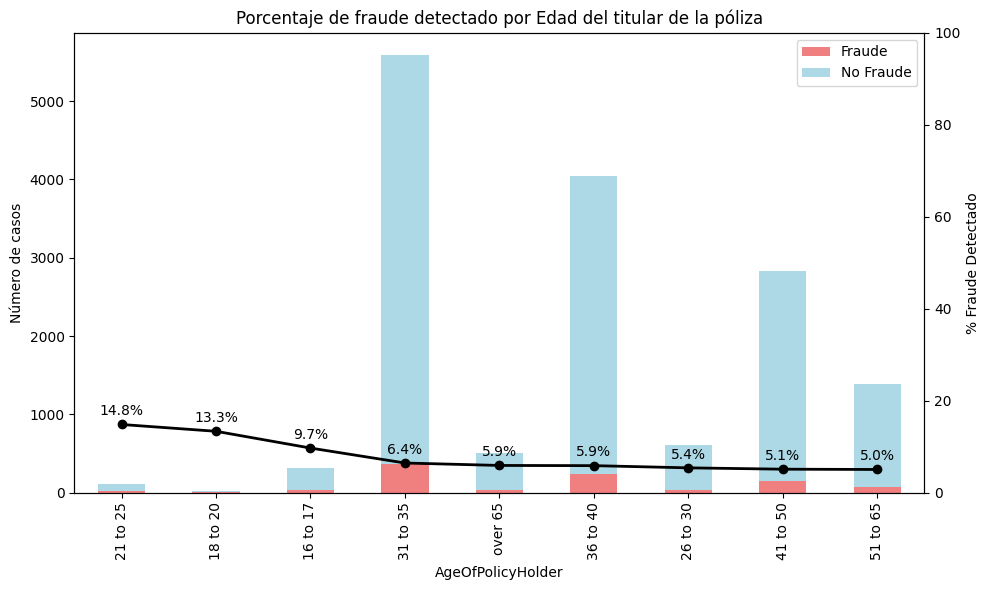

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['AgeOfPolicyHolder', 'FraudFound']).size().unstack(fill_value=0)

# Calcular porcentajes de "yes"
grouped_data['Fraude %'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100


top = grouped_data.sort_values(by='Fraude %', ascending=False).head(10)

top = top.sort_values(by='Fraude %', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
top[['Yes', 'No']].plot(kind='bar', stacked=True, ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_ylabel('Número de casos')
ax1.set_title('Porcentaje de fraude detectado por Edad del titular de la póliza')
ax1.legend(['Fraude', 'No Fraude'], loc='upper right')

# Eje secundario para línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(top.index, top['Fraude %'], color='black', marker='o', linewidth=2, label='% Fraude')
ax2.set_ylabel('% Fraude Detectado')
ax2.set_ylim(0, 100)

# Etiquetas
for i, val in enumerate(top['Fraude %']):
    ax2.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

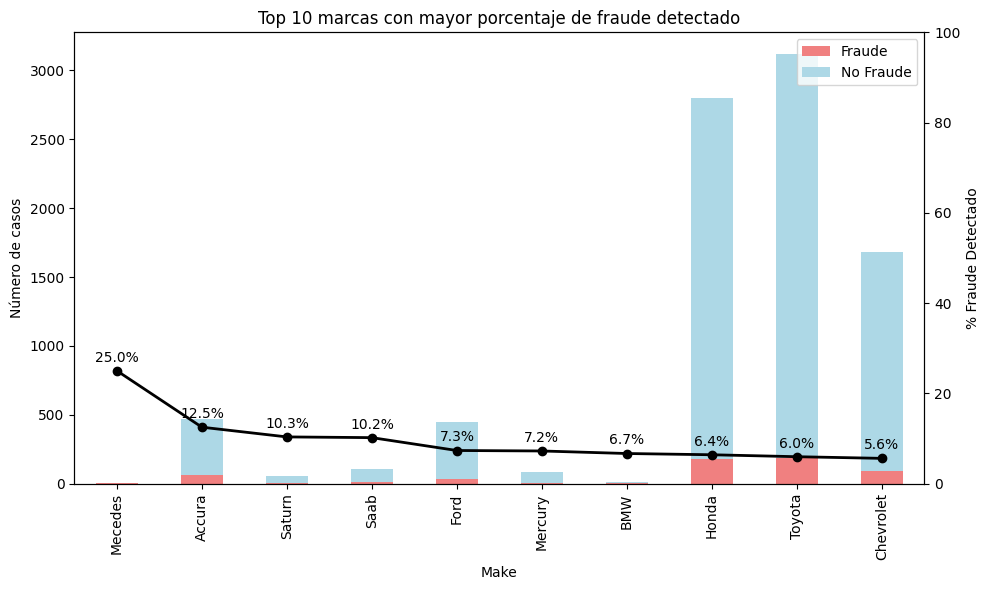

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['Make', 'FraudFound']).size().unstack(fill_value=0)

# Calcular porcentajes de "yes"
grouped_data['Fraude %'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100


top = grouped_data.sort_values(by='Fraude %', ascending=False).head(10)

top = top.sort_values(by='Fraude %', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
top[['Yes', 'No']].plot(kind='bar', stacked=True, ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_ylabel('Número de casos')
ax1.set_title('Top 10 marcas con mayor porcentaje de fraude detectado')
ax1.legend(['Fraude', 'No Fraude'], loc='upper right')

# Eje secundario para línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(top.index, top['Fraude %'], color='black', marker='o', linewidth=2, label='% Fraude')
ax2.set_ylabel('% Fraude Detectado')
ax2.set_ylim(0, 100)

# Etiquetas
for i, val in enumerate(top['Fraude %']):
    ax2.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


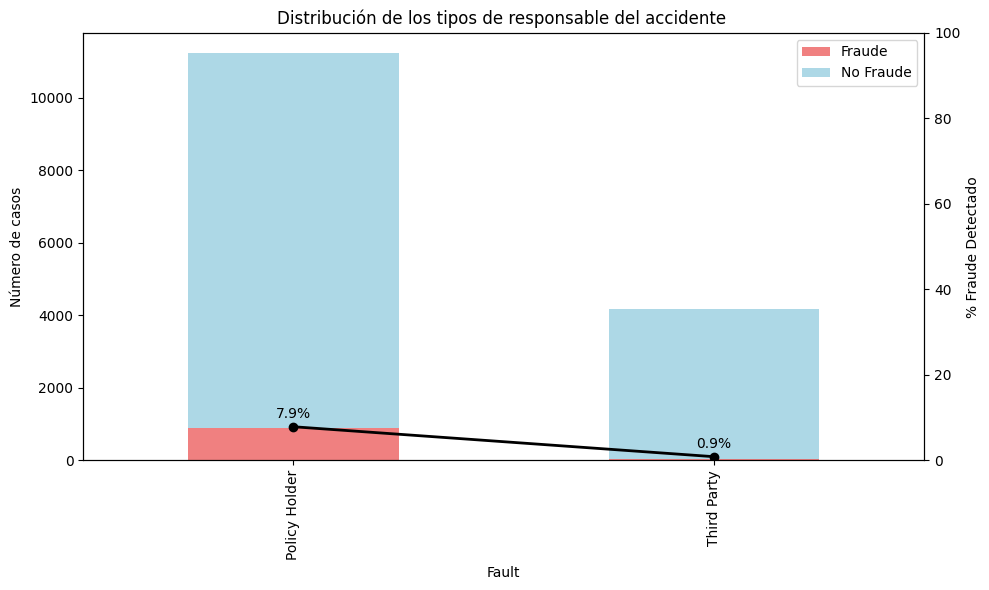

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['Fault', 'FraudFound']).size().unstack(fill_value=0)

# Calcular porcentajes de "yes"
grouped_data['Fraude %'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100


top = grouped_data.sort_values(by='Fraude %', ascending=False).head(10)

top = top.sort_values(by='Fraude %', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
top[['Yes', 'No']].plot(kind='bar', stacked=True, ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_ylabel('Número de casos')
ax1.set_title('Distribución de los tipos de responsable del accidente ')
ax1.legend(['Fraude', 'No Fraude'], loc='upper right')

# Eje secundario para línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(top.index, top['Fraude %'], color='black', marker='o', linewidth=2, label='% Fraude')
ax2.set_ylabel('% Fraude Detectado')
ax2.set_ylim(0, 100)

# Etiquetas
for i, val in enumerate(top['Fraude %']):
    ax2.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

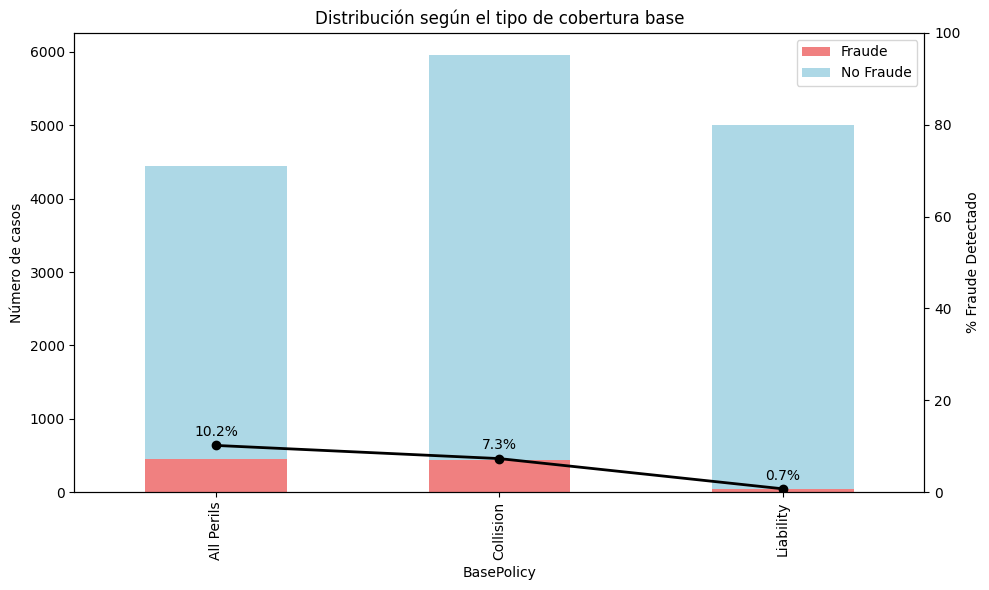

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['BasePolicy', 'FraudFound']).size().unstack(fill_value=0)

# Calcular porcentajes de "yes"
grouped_data['Fraude %'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100


top = grouped_data.sort_values(by='Fraude %', ascending=False).head(10)

top = top.sort_values(by='Fraude %', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
top[['Yes', 'No']].plot(kind='bar', stacked=True, ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_ylabel('Número de casos')
ax1.set_title('Distribución según el tipo de cobertura base')
ax1.legend(['Fraude', 'No Fraude'], loc='upper right')

# Eje secundario para línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(top.index, top['Fraude %'], color='black', marker='o', linewidth=2, label='% Fraude')
ax2.set_ylabel('% Fraude Detectado')
ax2.set_ylim(0, 100)

# Etiquetas
for i, val in enumerate(top['Fraude %']):
    ax2.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusiones:
1. El dataset contiene 15,420 registros y 33 columnas antes de la limpieza inicial.

2. La mayoría de las variables son categóricas (25) y el resto numéricas (8).

3. La variable objetivo FraudFound está fuertemente desbalanceada: solo 6% de los casos son fraude.

4. No se encontraron valores nulos, pero sí valores inválidos (como "0" en MonthClaimed y DayOfWeekClaimed), los cuales serán eliminados.

5. Las columnas Month, Age, PolicyType, RepNumber, Year y PolicyNumber se van eliminar.

6. Variables como WitnessPresent, AgentType, AddressChange-Claim y NumberOfCars presentan muy baja variabilidad → se consideran poco útiles para el modelo, pero se mantienen temporalmente para evaluar con SHAP.

7. Algunas variables categóricas (Make, Fault, VehiclePrice, etc.) muestran diferencias visuales claras entre clases, lo que indica potencial valor predictivo.

8. Variables numéricas como WeekOfMonth, Deductible y DriverRating no muestran diferencias relevantes entre clases → serán evaluadas más adelante con herramientas de importancia de features.

11. La matriz de correlación reveló baja correlación entre variables numéricas, lo cual es positivo (sin multicolinealidad).



# Limpieza de Datos

In [ ]:
# 0 no representa ningún día o mes válido, lo que indica un error en los datos.
data = data[(data['DayOfWeekClaimed'] != "0") & (data['MonthClaimed'] != "0")]

In [ ]:
# Se eliminan columnas, por novedades en sus datos y puede inducir a sobreajuste
data.drop(columns=['PolicyNumber'], inplace=True)
data.drop(columns=['Month'], inplace=True)
data.drop(columns=['Age'], inplace=True)
data.drop(columns=['RepNumber'], inplace=True)
data.drop(columns=['Year'], inplace=True)

In [ ]:
#Duplicados en filas
print("\nNúmero de filas duplicadas:")
print(data.duplicated().sum())


Número de filas duplicadas:
1


In [ ]:
display(data[data.duplicated(keep=False)].head(5))

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
1217,2,Monday,Pontiac,Urban,Tuesday,Jul,2,Male,Single,Third Party,...,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,All Perils,No
13437,2,Monday,Pontiac,Urban,Tuesday,Jul,2,Male,Single,Third Party,...,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,All Perils,No


In [ ]:
data = data.drop_duplicates(keep='first').reset_index(drop=True)
print(f"Nuevo tamaño del dataset: {data.shape}")
print("\nNúmero de filas duplicadas:")
print(data.duplicated().sum())

Nuevo tamaño del dataset: (15418, 28)

Número de filas duplicadas:
0


In [ ]:
# Verificar valores nulos
def analizar_valores_faltantes(data):
    valores_faltantes = data.isnull().sum()
    porcentaje = (valores_faltantes / len(data)) * 100

    datos_faltantes = pd.DataFrame({
        'Valores Faltantes': valores_faltantes,
        'Porcentaje': porcentaje
    })

    return datos_faltantes.sort_values('Porcentaje', ascending=False)

print("Análisis de Valores Faltantes Inicial:")
print(analizar_valores_faltantes(data))

Análisis de Valores Faltantes Inicial:
                      Valores Faltantes  Porcentaje
WeekOfMonth                           0         0.0
DayOfWeek                             0         0.0
Make                                  0         0.0
AccidentArea                          0         0.0
DayOfWeekClaimed                      0         0.0
MonthClaimed                          0         0.0
WeekOfMonthClaimed                    0         0.0
Sex                                   0         0.0
MaritalStatus                         0         0.0
Fault                                 0         0.0
PolicyType                            0         0.0
VehicleCategory                       0         0.0
VehiclePrice                          0         0.0
Deductible                            0         0.0
DriverRating                          0         0.0
Days:Policy-Accident                  0         0.0
Days:Policy-Claim                     0         0.0
PastNumberOfClaims       

In [ ]:
# Detectar posibles valores extraños
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"{col}: {data[col].unique()}")

DayOfWeek: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make: ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea: ['Urban' 'Rural']
DayOfWeekClaimed: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
MonthClaimed: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
Sex: ['Female' 'Male']
MaritalStatus: ['Single' 'Married' 'Widow' 'Divorced']
Fault: ['Policy Holder' 'Third Party']
PolicyType: ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']
VehicleCategory: ['Sport' 'Utility' 'Sedan']
VehiclePrice: ['more than 69,000' '20,000 to 29,000' '30,000 to 39,000'
 'less than 20,000' '40,000 to 59,000' '60,000 to 69,000']
Days:Policy-Accident: ['more than 

In [ ]:
data['Make'] = data['Make'].replace({
    'Accura': 'Acura',
    'Nisson': 'Nissan',
    'Mecedes': 'Mercedes',
    'Porche': 'Porsche'
})

In [ ]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating
count,15418.000000,15418.000000,15418.000000,15418.000000
mean,2.788689,2.694124,407.705280,2.487806
std,1.287638,1.259111,43.953761,1.119511
min,1.000000,1.000000,300.000000,1.000000
25%,2.000000,2.000000,400.000000,1.000000
50%,3.000000,3.000000,400.000000,2.000000
75%,4.000000,4.000000,400.000000,3.000000
max,5.000000,5.000000,700.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   WeekOfMonth           15418 non-null  int64 
 1   DayOfWeek             15418 non-null  object
 2   Make                  15418 non-null  object
 3   AccidentArea          15418 non-null  object
 4   DayOfWeekClaimed      15418 non-null  object
 5   MonthClaimed          15418 non-null  object
 6   WeekOfMonthClaimed    15418 non-null  int64 
 7   Sex                   15418 non-null  object
 8   MaritalStatus         15418 non-null  object
 9   Fault                 15418 non-null  object
 10  PolicyType            15418 non-null  object
 11  VehicleCategory       15418 non-null  object
 12  VehiclePrice          15418 non-null  object
 13  Deductible            15418 non-null  int64 
 14  DriverRating          15418 non-null  int64 
 15  Days:Policy-Accident  15418 non-null

Se realizaron las siguientes acciones de limpieza para garantizar la calidad del dataset:

- Se eliminaron registros con valores inválidos `"0"` en `DayOfWeekClaimed` y `MonthClaimed`.
- Se eliminaron las columnas `PolicyNumber` (ID único sin valor predictivo),  `Year` (poca variabilidad y sin relación clara con el fraude) y (PolicyType, Month, Age y RepNumber) por indicaciones del tutor.
- Se identificaron columnas con baja variabilidad (`WitnessPresent`, `AgentType`, `AddressChange-Claim` y `NumberOfCars`) que serán evaluadas en la etapa de importancia de variables antes de ser eliminadas.
- Se verificó la consistencia de los valores categóricos para detectar entradas erróneas o inconsistentes. Se encontraron y corrigieron los casos en la columna `Make`:

- `'Accura'` fue reemplazado por `'Acura'`
- `'Nisson'` por `'Nissan'`
- `'Mecedes'` por `'Mercedes'`
- `'Porche'` por `'Porsche'`


# Feature transformation

- Retraso de reclamación: Cuanto más tarde se presenta el reclamo tras un accidente, más sospechoso podría ser.
- Perfil de alto riesgo: Conductores con baja calificación y muchos reclamos previos pueden ser más propensos a fraude.
- Solo joven: Algunas combinaciones sociodemográficas pueden estar asociadas con patrones de comportamiento específicos.
- Vehículo caro: Vehículos de alto precio pueden estar más expuestos a intentos de fraude por el monto potencial.
- Reclamo de fin de semana: Presentar reclamos en fin de semana es poco común y puede ser un indicio anómalo.



ClaimLag (Retraso entre accidente y reclamo)

In [ ]:
days_map = {
    'none': 0,
    '1 to 7': 1,
    '8 to 15': 2,
    '15 to 30': 3,
    'more than 30': 4
}

data['DaysPolicyAccident'] = data['Days:Policy-Accident'].map(days_map)
data['DaysPolicyClaim'] = data['Days:Policy-Claim'].map(days_map)


In [ ]:
data['ClaimLag'] = data['DaysPolicyClaim'] - data['DaysPolicyAccident']


In [ ]:
data[['ClaimLag']].describe()


,ClaimLag
count,15418.00000
mean,0.02095
std,0.24748
min,-1.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,4.00000


In [ ]:
data[data['ClaimLag'] < 0].shape[0]


3

In [ ]:
data = data[data['ClaimLag'] >= 0]


In [ ]:
claims_map = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,
    'more than 4': 5
}
data['PastClaims'] = data['PastNumberOfClaims'].map(claims_map)


Perfil de alto riesgo identifica a conductores potencialmente riesgosos, definidos como aquellos que:

- Tienen una mala calificación como conductor (DriverRating <= 2)

- Han hecho varios reclamos previos (PastNumberOfClaims >= 3, que en nuestro caso mapeamos como '2 to 4' o 'more than 4' → que se convirtieron a 3 o 5)

In [ ]:
data['HighRiskProfile'] = ((data['DriverRating'] <= 2) & (data['PastClaims'] >= 3)).astype(int)

<Axes: xlabel='HighRiskProfile', ylabel='FraudFound'>

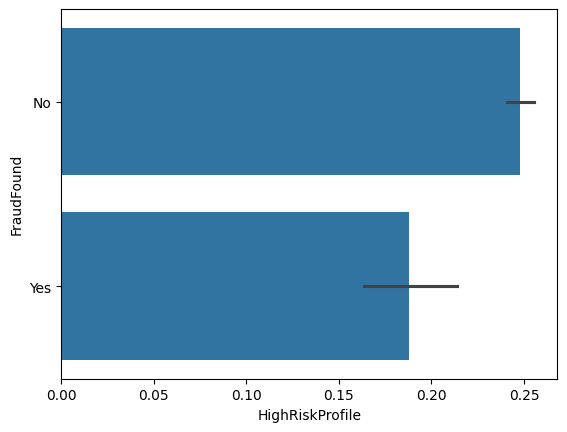

In [ ]:
sns.barplot(x='HighRiskProfile', y='FraudFound', data=data)

Es joven: es un tipo de segmentación demográfica que nos puede ayudar identificar perfiles con mayor probabilidad de estar asociados con fraude (por ejemplo, por patrones de comportamiento o experiencia al volante).

In [ ]:
young_ages = ['16 to 17', '18 to 20', '21 to 25']

data['IsSingleYoung'] = ((data['MaritalStatus'] == 'Single') &
                       (data['AgeOfPolicyHolder'].isin(young_ages))).astype(int)


<Axes: xlabel='IsSingleYoung', ylabel='FraudFound'>

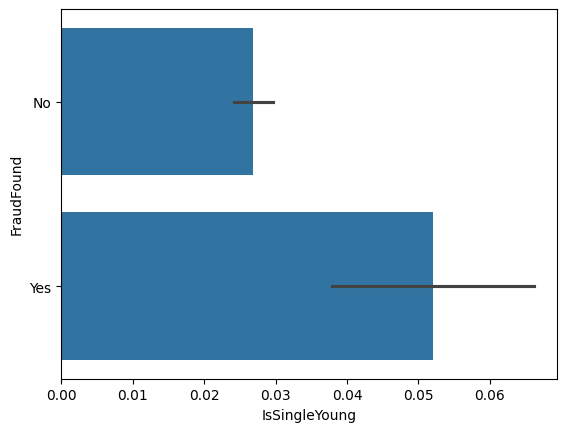

In [ ]:
sns.barplot(x='IsSingleYoung', y='FraudFound', data=data)


Vehículo caro indica si el vehículo asegurado está en una franja de precio alto, puede estar correlacionado con fraude, ya que mayores montos potenciales de indemnización pueden incentivar reclamos fraudulentos.



In [ ]:
expensive_range = ['60,000 to 69,000', 'more than 69,000']
data['ExpensiveVehicle'] = data['VehiclePrice'].isin(expensive_range).astype(int)


<Axes: xlabel='ExpensiveVehicle', ylabel='FraudFound'>

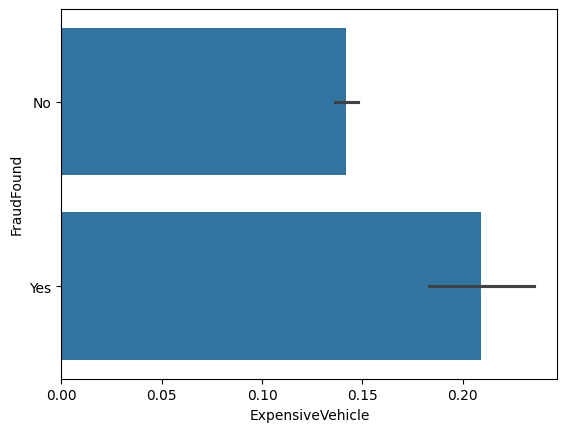

In [ ]:
sns.barplot(x='ExpensiveVehicle', y='FraudFound', data=data)

Reclamo en fin de semana nos ayudará a identificar reclamos que fueron hechos durante el fin de semana, lo cual puede ser atípico y potencialmente relacionado con fraude, ya que muchas aseguradoras tienen menor personal o disponibilidad en sábados y domingos, lo que podría facilitar comportamientos anómalos.

In [ ]:
data['WeekendClaim'] = data['DayOfWeekClaimed'].isin(['Saturday', 'Sunday']).astype(int)


<Axes: xlabel='WeekendClaim', ylabel='FraudFound'>

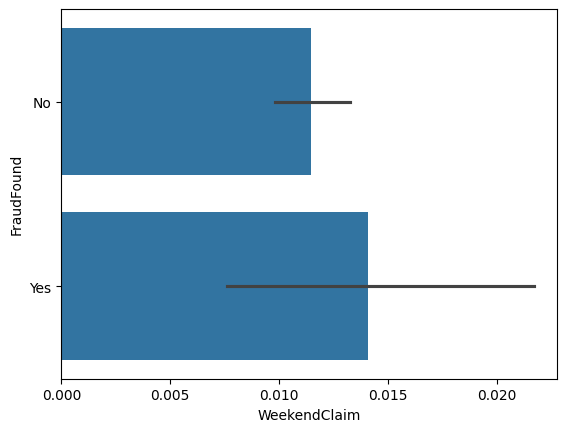

In [ ]:
sns.barplot(x='WeekendClaim', y='FraudFound', data=data)


In [ ]:
data[['ClaimLag', 'HighRiskProfile', 'IsSingleYoung', 'ExpensiveVehicle', 'FraudFound']].head(10)


,ClaimLag,HighRiskProfile,IsSingleYoung,ExpensiveVehicle,FraudFound
0,0,0,0,1,No
1,0,0,0,1,No
2,0,0,0,1,No
3,0,0,0,0,No
4,0,0,0,1,No
5,0,0,1,1,No
6,0,0,0,1,No
7,0,0,1,1,No
8,0,0,0,1,No
9,0,1,0,1,No


# Preprocesamiento y codificación de variables

In [ ]:
data.head(10)

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,...,BasePolicy,FraudFound,DaysPolicyAccident,DaysPolicyClaim,ClaimLag,PastClaims,HighRiskProfile,IsSingleYoung,ExpensiveVehicle,WeekendClaim
0,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,Policy Holder,...,Liability,No,4,4,0,0,0,0,1,0
1,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,Policy Holder,...,Collision,No,4,4,0,0,0,0,1,0
2,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,Policy Holder,...,Collision,No,4,4,0,1,0,0,1,0
3,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,Third Party,...,Liability,No,4,4,0,1,0,0,0,0
4,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,Third Party,...,Collision,No,4,4,0,0,0,0,1,0
5,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,Third Party,...,Collision,No,4,4,0,0,0,1,1,0
6,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,Third Party,...,Collision,No,4,4,0,1,0,0,1,0
7,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,Policy Holder,...,Collision,No,4,4,0,1,0,1,1,0
8,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,Policy Holder,...,Collision,No,4,4,0,0,0,0,1,0
9,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,Policy Holder,...,All Perils,No,4,4,0,3,1,0,1,0


In [ ]:
vehicle_price_map = {
    'less than 20,000': 0,
    '20,000 to 29,000': 1,
    '30,000 to 39,000': 2,
    '40,000 to 59,000': 3,
    '60,000 to 69,000': 4,
    'more than 69,000': 5
}
data['VehiclePrice'] = data['VehiclePrice'].map(vehicle_price_map)


In [ ]:
days_map = {
    'none': 0,
    '1 to 7': 1,
    '8 to 15': 2,
    '15 to 30': 3,
    'more than 30': 4
}
data['DaysPolicyAccident'] = data['Days:Policy-Accident'].map(days_map)
data['DaysPolicyClaim'] = data['Days:Policy-Claim'].map(days_map)


In [ ]:
claims_map = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,
    'more than 4': 5
}
data['PastClaims'] = data['PastNumberOfClaims'].map(claims_map)


In [ ]:
vehicle_age_map = {
    'new': 0,
    '2 years': 1,
    '3 years': 2,
    '4 years': 3,
    '5 years': 4,
    '6 years': 5,
    '7 years': 6,
    'more than 7': 7
}
data['AgeOfVehicle'] = data['AgeOfVehicle'].map(vehicle_age_map)


In [ ]:
policyholder_age_map = {
    '16 to 17': 0,
    '18 to 20': 1,
    '21 to 25': 2,
    '26 to 30': 3,
    '31 to 35': 4,
    '36 to 40': 5,
    '41 to 50': 6,
    '51 to 65': 7,
    'over 65': 8
}
data['AgeOfPolicyHolder'] = data['AgeOfPolicyHolder'].map(policyholder_age_map)


In [ ]:
suppliments_map = {
    'none': 0,
    '1 to 2': 1,
    '3 to 5': 2,
    'more than 5': 3
}
data['NumberOfSuppliments'] = data['NumberOfSuppliments'].map(suppliments_map)

address_map = {
    'no change': 0,
    'under 6 months': 1,
    '1 year': 2,
    '2 to 3 years': 3,
    '4 to 8 years': 4
}
data['AddressChange_Claim'] = data['AddressChange-Claim'].map(address_map)

cars_map = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 3,
    '5 to 8': 4,
    'more than 8': 5
}
data['NumberOfCars'] = data['NumberOfCars'].map(cars_map)


In [ ]:
cols_to_dummify = [
    'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'Make',
    'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
    'PolicyType', 'VehicleCategory', 'PoliceReportFiled',
    'WitnessPresent', 'AgentType', 'BasePolicy'
]

data = pd.get_dummies(data, columns=cols_to_dummify, drop_first=True)


In [ ]:
data['FraudFound'] = data['FraudFound'].map({'No': 0, 'Yes': 1})


In [ ]:
# las 4 columnas tipo object que siguen en el dataset, ya fueron transformadas
data.drop(columns=[
    'Days:Policy-Accident',
    'Days:Policy-Claim',
    'PastNumberOfClaims',
    'AddressChange-Claim'
], inplace=True)


In [ ]:
data.dtypes.value_counts()

,count
bool,62
int64,19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15415 entries, 0 to 15417
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   WeekOfMonth                      15415 non-null  int64
 1   WeekOfMonthClaimed               15415 non-null  int64
 2   VehiclePrice                     15415 non-null  int64
 3   Deductible                       15415 non-null  int64
 4   DriverRating                     15415 non-null  int64
 5   AgeOfVehicle                     15415 non-null  int64
 6   AgeOfPolicyHolder                15415 non-null  int64
 7   NumberOfSuppliments              15415 non-null  int64
 8   NumberOfCars                     15415 non-null  int64
 9   FraudFound                       15415 non-null  int64
 10  DaysPolicyAccident               15415 non-null  int64
 11  DaysPolicyClaim                  15415 non-null  int64
 12  ClaimLag                         15415 non-null  in

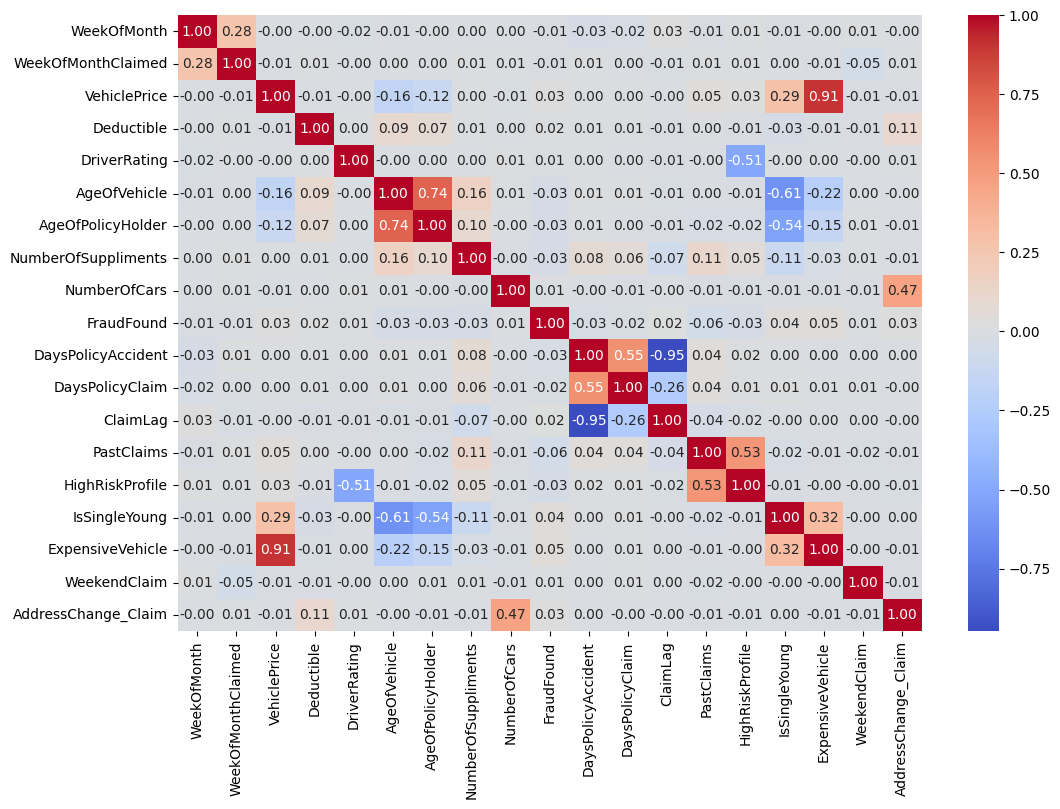

In [ ]:
# Visualización de correlaciones entre variables numéricas
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Data Splitting

In [ ]:
X = data.drop('FraudFound', axis=1)
y = data['FraudFound']

In [ ]:
# Split inicial: 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Split secundario: de train_val, 75% train (60% total) y 25% validación (20% total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

#Tamaños creados
print("Tamaños de los conjuntos:")
print(f"  Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(data)*100:.1f}%)")
print(f"  Validación:    {X_val.shape[0]} muestras ({X_val.shape[0]/len(data)*100:.1f}%)")
print(f"  Prueba:        {X_test.shape[0]} muestras ({X_test.shape[0]/len(data)*100:.1f}%)")

Tamaños de los conjuntos:
  Entrenamiento: 9249 muestras (60.0%)
  Validación:    3083 muestras (20.0%)
  Prueba:        3083 muestras (20.0%)


# Manejo de Desbalance

In [ ]:
freq = y_train.value_counts(normalize=True)
print(freq)


FraudFound
0    0.940102
1    0.059898
Name: proportion, dtype: float64


La clase fraudulenta representa menos del 10 % del total, hablamos de desequilibrio severo

In [ ]:
print("Distribución de clases original en el conjunto de entrenamiento:")
print(Counter(y_train))

Distribución de clases original en el conjunto de entrenamiento:
Counter({0: 8695, 1: 554})


In [ ]:
# 1. Submuestreo aleatorio
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# 2. Sobremuestreo SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

# 3. Clasificador con pesos
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
print('AUC con class_weight:', scores.mean())

# 4. Evaluar modelos balanceados
clf_rus = RandomForestClassifier(random_state=42)
print('AUC undersampling:', cross_val_score(clf_rus, X_rus, y_rus, cv=5, scoring='roc_auc').mean())

clf_sm = RandomForestClassifier(random_state=42)
print('AUC SMOTE:', cross_val_score(clf_sm, X_sm, y_sm, cv=5, scoring='roc_auc').mean())

AUC con class_weight: 0.7939885010212785
AUC undersampling: 0.8111405508702806
AUC SMOTE: 0.9946009766143616


El AUC con class_weight (0.794) y undersampling (0.811) son razonables para el 6 % de positivos; sin embargo, el AUC extremo de SMOTE (0.995) sugiere posible sobreajuste o fuga de información entre folds

In [ ]:
print("Distribución de clases tras aplicar RandomUnderSampler:")
print(Counter(y_rus))

Distribución de clases tras aplicar RandomUnderSampler:
Counter({0: 554, 1: 554})


# Selección de modelos

Se realizó una investigación previa de los modelos de clasificación a utilizar:

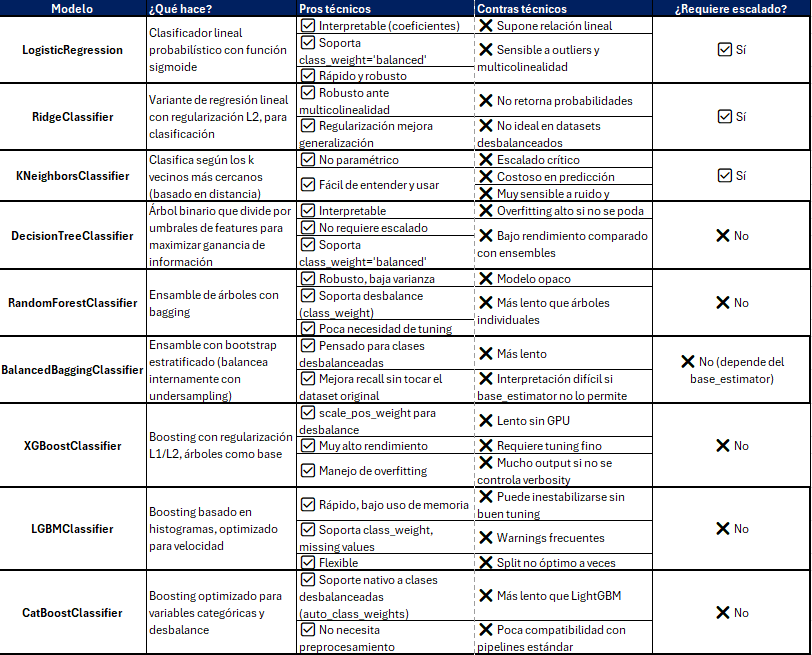

Para un sistema de detección de fraude, donde se busca alto recall en la clase positiva, se tomó en consideración las buenas prácticas, se seleccionaron 5 modelos productivos y confiables:

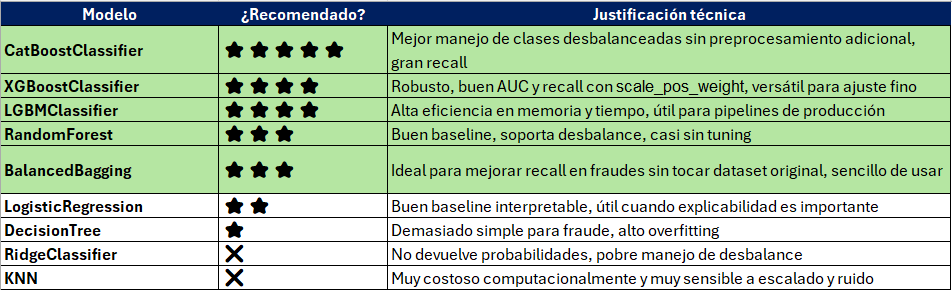

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
X_resampled = X_rus
y_resampled = y_rus

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
from time import time
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning

# Ignorar warnings de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*No further splits with positive gain.*")

# 1. Configurar validación estratificada
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# 2. Definir modelos seleccionados
models = {
    'CatBoost': CatBoostClassifier(
        learning_rate=0.01,
        depth=6,
        iterations=500,
        auto_class_weights='Balanced',
        random_seed=42,
        verbose=False
    ),
    'XGBoost': XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        eval_metric='auc',
        scale_pos_weight=(len(y_resampled) - sum(y_resampled)) / sum(y_resampled),
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        verbosity= -1,
        num_leaves=31,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced',
        random_state=42
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=500,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ),
    'BalancedBagging': BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=6, class_weight='balanced'),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
    )
}

# 3. Inicializar listas para métricas
accuracy, precision, recall, f1, roc_auc, times = [], [], [], [], [], []

# 4. Evaluación justa
for name, model in models.items():
    start = time()
    model.fit(X_resampled, y_resampled)
    end = time()

    # Predicción
    y_pred = model.predict(X_test)

    # Probabilidades para ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = np.zeros_like(y_pred)  # Fallback, AUC será incorrecto

    # Cálculo de métricas
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, zero_division=0))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan)
    times.append(end - start)

# 5. Mostrar resultados
results = pd.DataFrame({
    'model': list(models.keys()),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc,
    'time_sec': times
})
print("\n📊 Tabla de evaluación de modelos en datos de Prueba\n")
print(results)



📊 Tabla de evaluación de modelos en datos de Prueba

             model  accuracy  precision    recall        f1   roc_auc  \
0         CatBoost  0.598767   0.125267  0.956522  0.221523  0.813748   
1          XGBoost  0.675316   0.128298  0.766304  0.219797  0.803229   
2         LightGBM  0.679857   0.137962  0.831522  0.236659  0.814304   
3     RandomForest  0.596497   0.124113  0.951087  0.219573  0.807242   
4  BalancedBagging  0.594226   0.121899  0.934783  0.215674  0.807537   

   time_sec  
0  2.372665  
1  1.449897  
2  0.386262  
3  2.277731  
4  8.691878  


En está primera corrida, obtuvimos los siguientes resultados:
🎯 **Recall (detección de fraudes verdaderos)**
- CatBoost, RandomForest y BalancedBagging obtienen un recall >0.93, lo cual es excelente para evitar fraudes no detectados.
- XGBoost y LightGBM están por debajo (aunque aún muy aceptables: ~0.76-0.83).

🧠 **Precision (evitar falsos positivos)**
- Todos tienen precision baja (~12%–14%), lo esperado en problemas con clases altamente desbalanceadas.
- LightGBM lidera en precision (0.138), lo que sugiere mejor equilibrio entre acertar fraudes y no molestar al sistema con muchos falsos positivos.

**⚖️ F1-score (balance entre precision y recall)**
- LightGBM también lidera en F1 (0.237), lo que confirma su buen balance.
- CatBoost y RandomForest quedan apenas por debajo.

📈 **ROC AUC (calidad del score en general)**
- Todos los modelos tienen AUC > 0.80, lo que indica que están rankeando bien las clases.
- LightGBM es el mejor (0.814), seguido por CatBoost (0.813) y BalancedBagging (0.807).

⚡ **Tiempo de entrenamiento**
- LightGBM es el más rápido con diferencia (0.20 s).
- BalancedBagging el más lento (4.78 s), lo esperable por ser un ensamble de árboles balanceados.



Se procederá a buscar los óptimos hiperparámetros de cada modelo

In [ ]:
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from scipy.stats import loguniform, randint, uniform
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning


# Ignorar advertencias de convergencia y otras comunes
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", message=".*total space of parameters.*")
warnings.filterwarnings("ignore", message=".*One or more of the test scores are non-finite.*")
warnings.filterwarnings("ignore", message=".*No further splits with positive gain.*")

# 1. Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Definir modelos
models = {
    'LGBMClassifier': LGBMClassifier(random_state=42, verbosity=-1),
    'XGBoostClassifier': XGBClassifier(random_state=42, eval_metric='auc'),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'BalancedBaggingClassifier': BalancedBaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=6, class_weight='balanced'),
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    )
}

# 3. Hiperparámetros por modelo
param_grids = {
    'LGBMClassifier': {
        'n_estimators': [200, 500, 1000],
        'learning_rate': loguniform(1e-3, 0.3),
        'verbosity': [-1],
        'num_leaves': randint(20, 150),
        'max_depth': randint(3, 12),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
        'class_weight': ['balanced', None]
    },
    'XGBoostClassifier': {
        'n_estimators': [200, 500, 1000],
        'learning_rate': loguniform(1e-3, 0.3),
        'max_depth': randint(3, 12),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
        'scale_pos_weight': [
            (len(y_resampled) - sum(y_resampled)) / sum(y_resampled), 1
        ]
    },
    'RandomForestClassifier': {
        'n_estimators': [200, 500, 1000],
        'max_depth': randint(3, 15),
        'min_samples_split': randint(2, 10),
        'class_weight': ['balanced', 'balanced_subsample', None]
    },
    'BalancedBaggingClassifier': {
    'n_estimators': [30, 50, 70],
    'replacement': [True, False],
    'sampling_strategy': ['auto', 0.75]
    }
}

# 4. Búsqueda por modelo (sin SMOTE en pipeline porque ya usamos RUS antes)
best_estimators = {}
for name, model in models.items():
    print(f"🔍 Buscando mejores hiperparámetros para: {name}")

    # Ajuste de nombres para RandomizedSearchCV
    param_dist = {f"clf__{k}": v for k, v in param_grids[name].items()}

    # ✅ Pipeline sin SMOTE porque ya usamos undersampling (RUS)
    pipe = Pipeline([
        ('clf', model)
    ])

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        n_iter=30,
        scoring='f1',
        cv=skf,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    # Entrenar usando datos ya balanceados por RUS
    search.fit(X_resampled, y_resampled)

    best_estimators[name] = search.best_estimator_
    print(f"✅ {name} — Mejor F1 (CV): {search.best_score_:.4f}")
    print("Mejores parámetros:", search.best_params_, "\n")

# 5. CatBoost por separado
print("🔍 Buscando mejores hiperparámetros para: CatBoostClassifier")
cat_model = CatBoostClassifier(
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=0
)

cat_params = {
    'learning_rate': loguniform(1e-3, 0.3),
    'depth': randint(3, 10),
    'iterations': [200, 500, 1000]
}

search_cat = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=30,
    scoring='f1',
    cv=skf,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

search_cat.fit(X_resampled, y_resampled)
best_estimators['CatBoostClassifier'] = search_cat.best_estimator_
print(f"✅ CatBoost — Mejor F1 (CV): {search_cat.best_score_:.4f}")
print("Mejores parámetros:", search_cat.best_params_, "\n")

# 6. Evaluación en el conjunto de prueba
print("\n📊 Evaluación final en el conjunto de prueba:")
for name, model in best_estimators.items():
    print(f"\n🧪 Modelo: {name}")
    y_pred = model.predict(X_test)

    # Calcular AUC según disponibilidad
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    else:
        print("ROC AUC: No disponible")

    print(classification_report(y_test, y_pred, digits=4))

🔍 Buscando mejores hiperparámetros para: LGBMClassifier
✅ LGBMClassifier — Mejor F1 (CV): 0.8067
Mejores parámetros: {'clf__class_weight': None, 'clf__colsample_bytree': np.float64(0.8143098736299034), 'clf__learning_rate': np.float64(0.0016736271346124197), 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__num_leaves': 143, 'clf__subsample': np.float64(0.8032795106962874), 'clf__verbosity': -1} 

🔍 Buscando mejores hiperparámetros para: XGBoostClassifier
✅ XGBoostClassifier — Mejor F1 (CV): 0.8079
Mejores parámetros: {'clf__colsample_bytree': np.float64(0.8270801311279966), 'clf__learning_rate': np.float64(0.0011955474632671572), 'clf__max_depth': 4, 'clf__n_estimators': 500, 'clf__scale_pos_weight': 1, 'clf__subsample': np.float64(0.9757995766256756)} 

🔍 Buscando mejores hiperparámetros para: RandomForestClassifier
✅ RandomForestClassifier — Mejor F1 (CV): 0.8054
Mejores parámetros: {'clf__class_weight': 'balanced_subsample', 'clf__max_depth': 4, 'clf__min_samples_split': 3, 'clf

El modelo CatBoostClassifier destacó con el mayor F1 en validación cruzada (0.8110) y un recall en test de 0.9620, evidenciando su eficacia en identificar correctamente la clase minoritaria sin comprometer la generalización. Muy de cerca le siguió XGBoostClassifier, con un F1 de 0.8079 y un sólido AUC de 0.8019, demostrando ser una alternativa igualmente robusta. BalancedBaggingClassifier se posicionó como el modelo con mejor AUC en el conjunto de prueba (0.8075), ofreciendo gran desempeño con un enfoque más sencillo basado en ensambles de árboles balanceados. LightGBM y RandomForest también mostraron resultados consistentes (F1 > 0.805 y recall > 0.96), aunque ligeramente por debajo de los anteriores. En conjunto, los cinco modelos lograron altos niveles de recall y AUC, sin embargo, se seleccionaron 3 modelos para entender su comportamiento

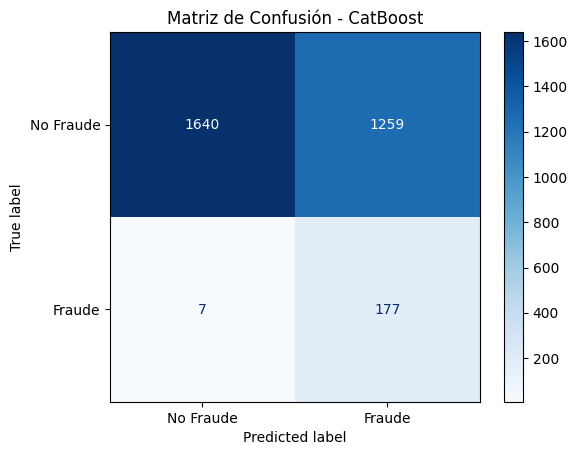

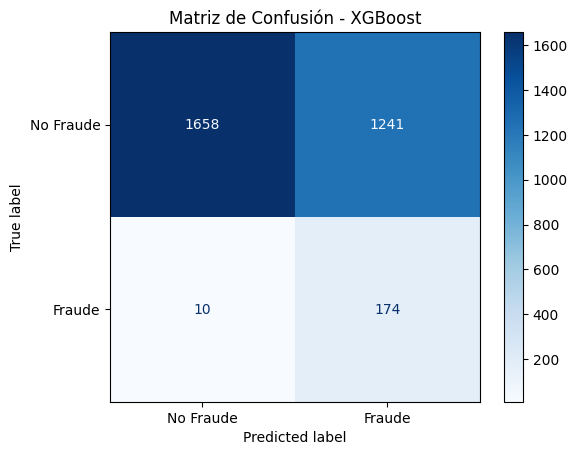

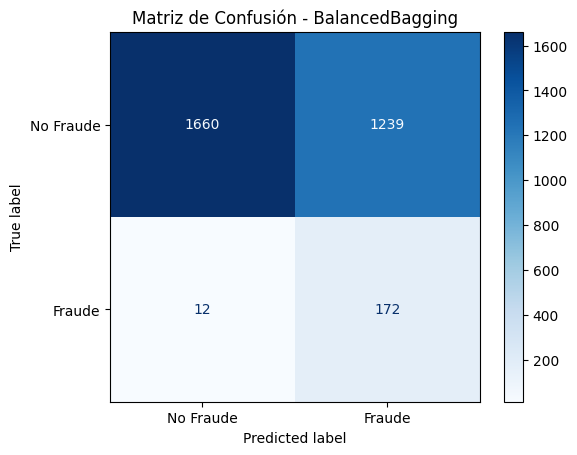

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener predicciones de los 3 mejores modelos
y_pred_catboost = best_estimators['CatBoostClassifier'].predict(X_test)
y_pred_xgboost = best_estimators['XGBoostClassifier'].predict(X_test)
y_pred_bbagging = best_estimators['BalancedBaggingClassifier'].predict(X_test)

# Función para graficar
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraude', 'Fraude'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

# Graficar cada una
plot_conf_matrix(y_test, y_pred_catboost, 'CatBoost')
plot_conf_matrix(y_test, y_pred_xgboost, 'XGBoost')
plot_conf_matrix(y_test, y_pred_bbagging, 'BalancedBagging')


Los 3 modelos detectan la mayoría de los fraudes, pero con muchos falsos positivos.

# Interpretabilidad (SHAP)

In [ ]:
pip install shap


In [ ]:
import shap
import matplotlib.pyplot as plt

💡 Interpretabilidad: CatBoost


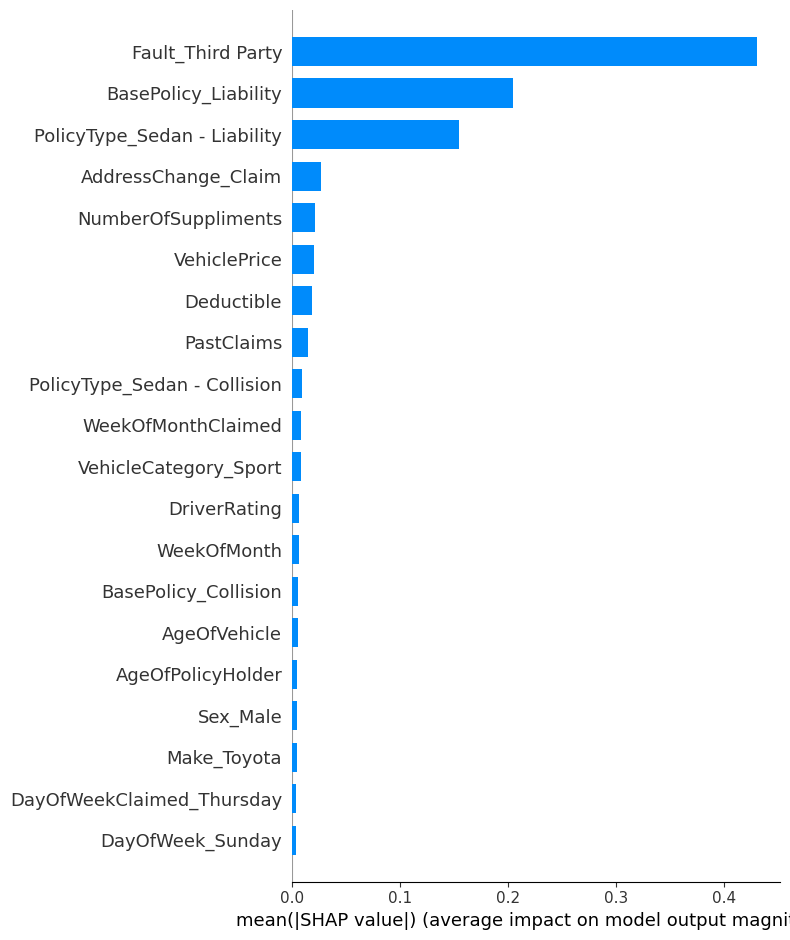

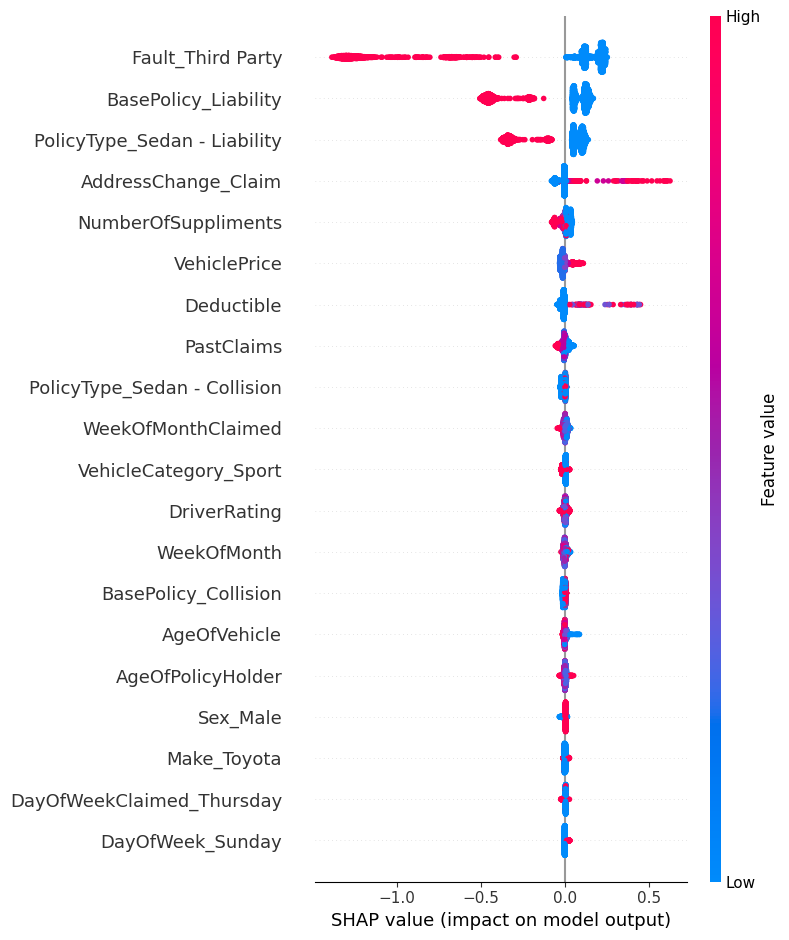

In [ ]:
print("💡 Interpretabilidad: CatBoost")
explainer_cb = shap.TreeExplainer(best_estimators['CatBoostClassifier'])
shap_values_cb = explainer_cb.shap_values(X_val)

shap.summary_plot(shap_values_cb, X_val, plot_type="bar", show=True)
shap.summary_plot(shap_values_cb, X_val, show=True)


📊 El Gráfico 1 muestra el impacto medio absoluto de cada variable sobre la predicción. Es decir, qué tan importantes fueron en general.

Las tres variables más importantes son:

- Fault_Third Party: tiene el mayor impacto en el resultado del modelo.

- BasePolicy_Liability: contribuye significativamente a las predicciones.

- PolicyType_Sedan - Liability: también tiene una influencia relevante.

Esto sugiere que el tipo de póliza y la asignación de culpa son los principales determinantes del modelo para detectar fraudes.

🌈 Gráfico 2 muestra no solo la importancia, sino también cómo los valores altos o bajos de cada variable influyen en la predicción:

- En Fault_Third Party, los valores altos (color rojo) empujan la predicción hacia fraude, lo cual es coherente: si el culpable es un "tercero", hay más sospecha de fraude.

- En BasePolicy_Liability, los valores altos también empujan hacia una mayor probabilidad de fraude.

- Para variables como AddressChange_Claim, valores altos también generan un impacto positivo, aumentando la probabilidad de fraude (esto puede representar cambios sospechosos justo antes del reclamo).

💡 Interpretabilidad: XGBoost


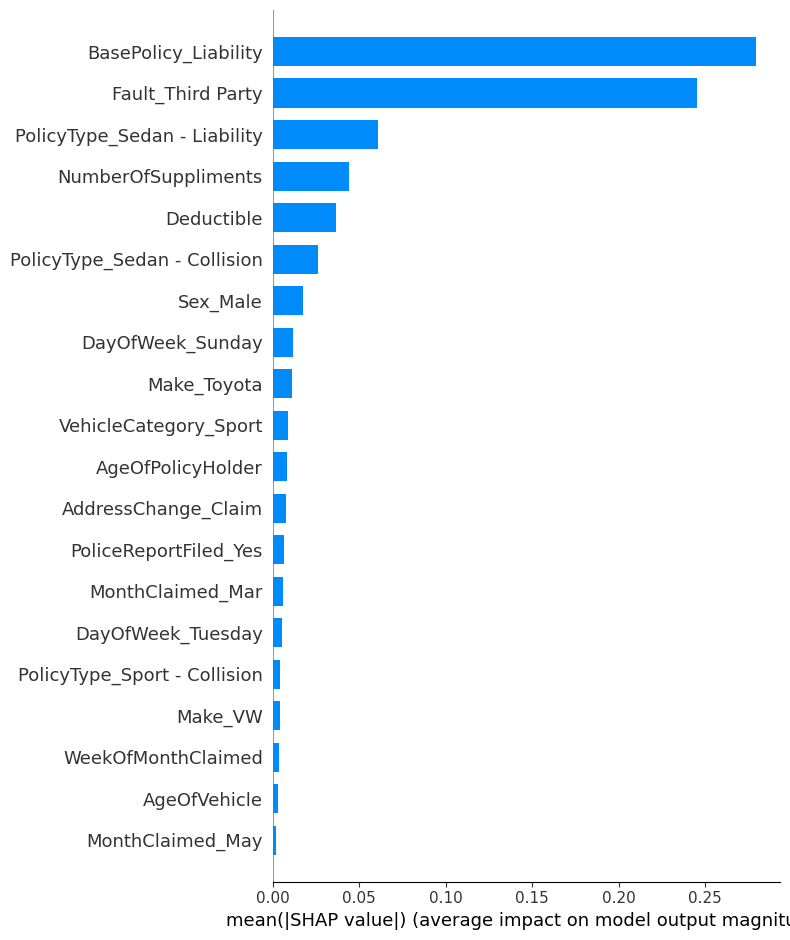

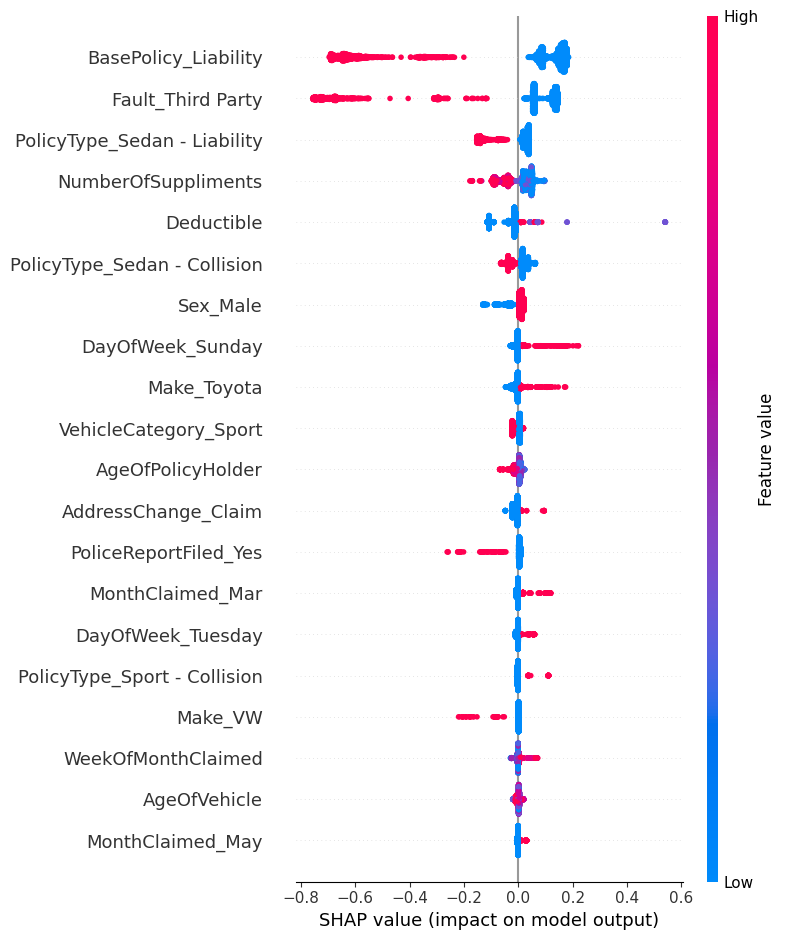

In [ ]:
print("💡 Interpretabilidad: XGBoost")
xgb_model = best_estimators['XGBoostClassifier'].named_steps['clf']  # extraer modelo
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_val)
shap.summary_plot(shap_values_xgb, X_val, plot_type="bar", show=True)
shap.summary_plot(shap_values_xgb, X_val, show=True)


📊 Gráfico 1 muestra qué variables tuvieron, en promedio, el mayor impacto en las predicciones del modelo.

🔝 Principales características:
- BasePolicy_Liability y Fault_Third Party son los factores más influyentes, lo que sugiere que el tipo de póliza y el tipo de culpa son determinantes para identificar casos sospechosos de fraude.

- PolicyType_Sedan - Liability y Número de Suplementos también tienen impacto moderado, reflejando posibles patrones relacionados con tipos de vehículo y número de reclamaciones adicionales.

- Variables como Sex_Male, VehicleCategory_Sport o Make_Toyota tienen un impacto menor pero consistente.

🎯 Gráfico 2 complementa la anterior mostrando cómo el valor alto o bajo de cada feature afecta la predicción del modelo.

🎨 Lecturas clave:
- BasePolicy_Liability (rojo = alto valor) tiende a reducir la predicción de fraude (efecto negativo en la salida del modelo), mientras que valores bajos (azul) aumentan la predicción.

- Fault_Third Party cuando es alto (en rojo) aumenta fuertemente la probabilidad de fraude, lo que es lógico si el tercero tiene la culpa y el asegurado está reclamando.

- Para features como Deductible o VehiclePrice, los valores altos (rojos) tienden a tener poco efecto en comparación con otros factores más categóricos.

💡 Interpretabilidad: LightGBM


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


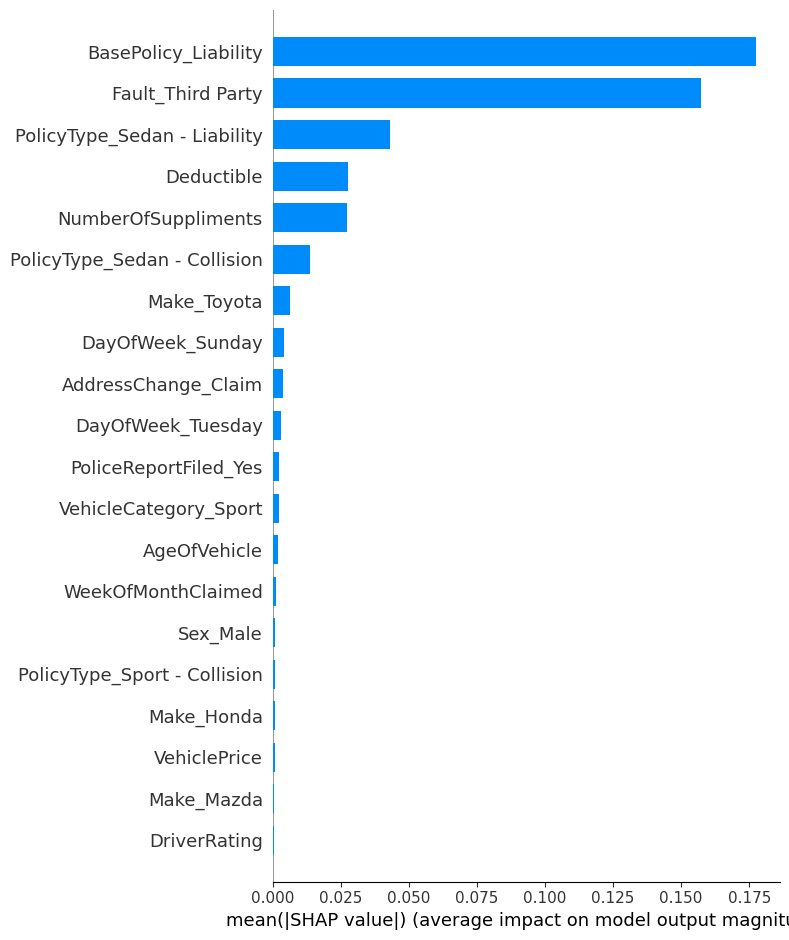

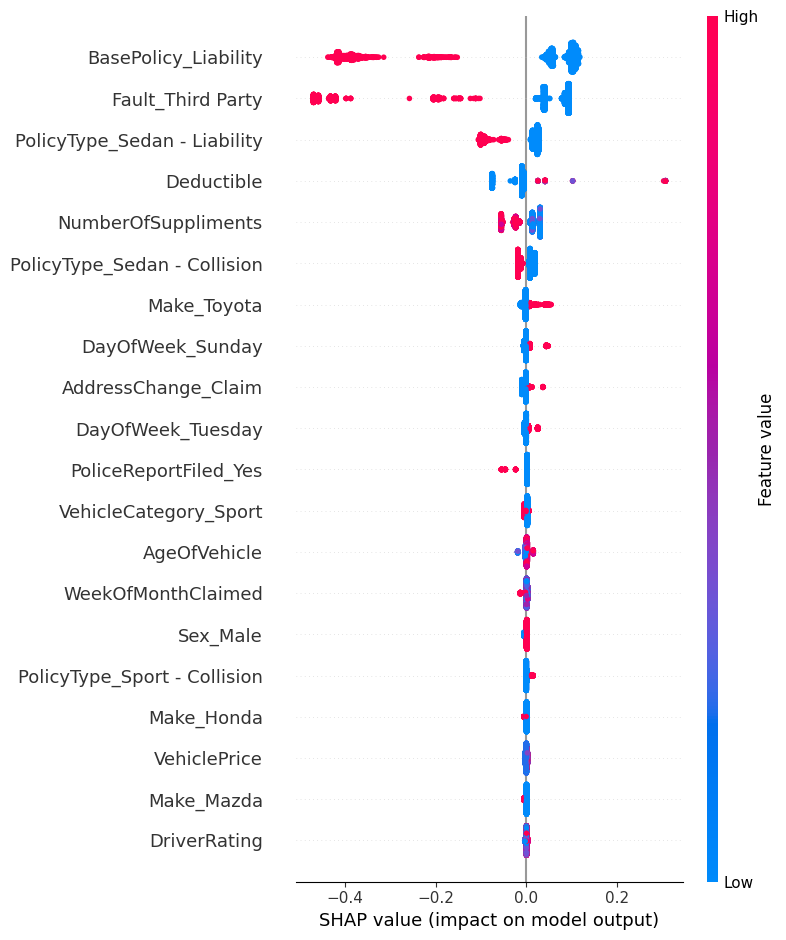

In [ ]:
print("💡 Interpretabilidad: LightGBM")
lgb_model = best_estimators['LGBMClassifier'].named_steps['clf']
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X_val)
shap.summary_plot(shap_values_lgb, X_val, plot_type="bar", show=True)
shap.summary_plot(shap_values_lgb, X_val, show=True)

📊 Gráfico 1 representa la importancia promedio de cada variable (media del valor absoluto SHAP).

- BasePolicy_Liability y Fault_Third Party destacan con diferencia sobre el resto, indicando que el tipo de póliza y la culpa en el accidente son los mayores impulsores del modelo.

🌈 Gráfico 2 muestra el efecto de los valores altos (rojo) y bajos (azul) de cada variable sobre la salida del modelo.

Por ejemplo:

- Valores altos de BasePolicy_Liability y Fault_Third Party tienden a reducir la probabilidad de fraude (desplazamiento hacia valores SHAP negativos).

- En contraste, valores bajos de Deductible o NumberOfSuppliments pueden aumentar la probabilidad de fraude.

**Comparación de Interpretabilidad SHAP — Top 3 Modelos**
- Variables más relevantes en común:
  - Fault_Third Party
  - BasePolicy_Liability
  - PolicyType_Sedan - Liability
  - Deductible
  - NumberOfSuppliments

- Diferencias notables entre modelos:
  - CatBoost:	PastClaims y VehiclePrice son variables adicionales destacadas (son sensibles).
  - XGBoost:	Make_Toyota y VehicleCategory_Sport	son variables adicionales destacadas.
  - LightGBM:	Sex_Male, DayOfWeek_Sunday y AddressChange_Claim son variables de Comportamientos demográficos destacados.

**Hallasgo:** El alto valor predictivo de variables como Fault_Third Party y BasePolicy_Liability sugiere que el fraude puede estar más relacionado con la naturaleza del contrato y no tanto con el perfil personal.

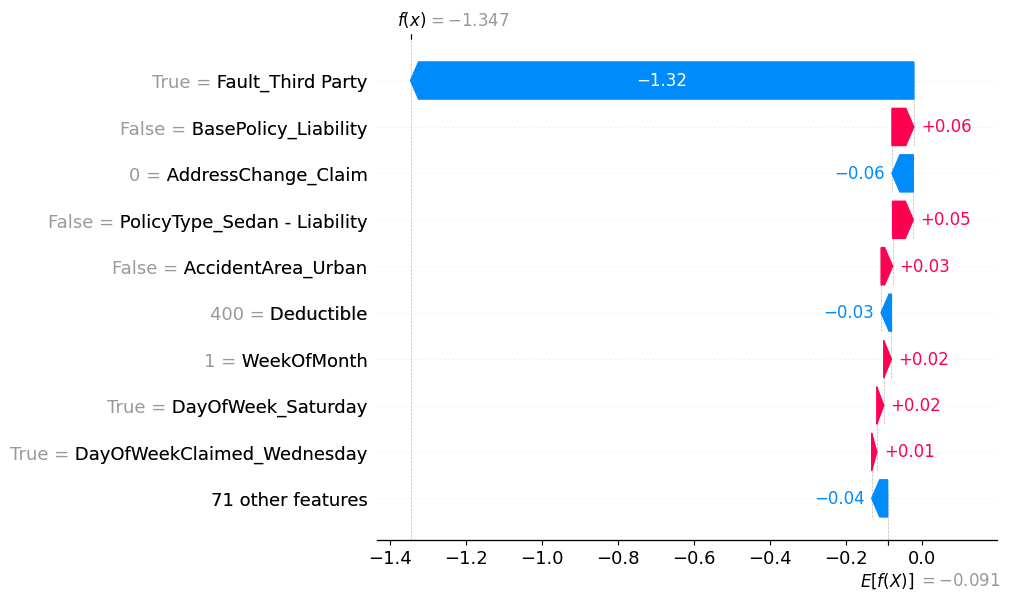

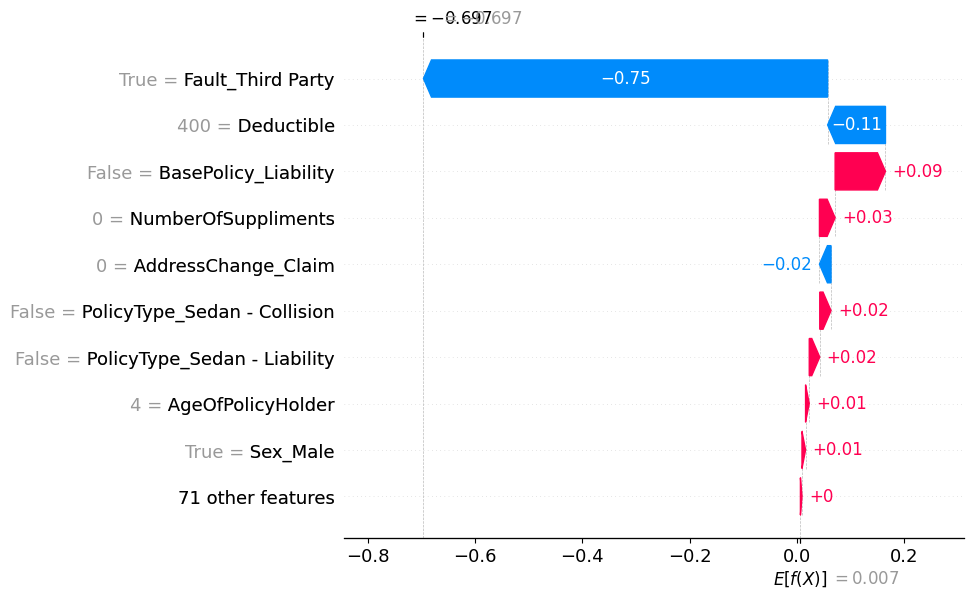

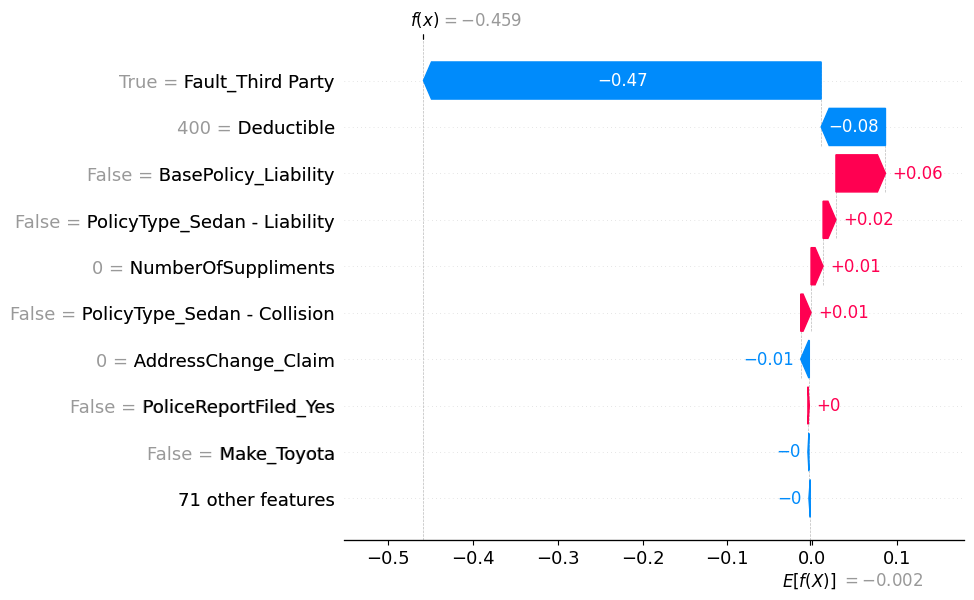

In [ ]:
# Seleccionar una instancia a explicar
instance_index = 0
# Asegurarnos de pasar un DataFrame (no una Series)
instance = X_val.iloc[[0]]  # Doble corchete para mantenerlo como DataFrame

# Crear el TreeExplainer directamente desde los modelos entrenados
explainer_cat = shap.TreeExplainer(best_estimators['CatBoostClassifier'])
explainer_xgb = shap.TreeExplainer(best_estimators['XGBoostClassifier'].named_steps['clf'])
explainer_lgb = shap.TreeExplainer(best_estimators['LGBMClassifier'].named_steps['clf'])

# Obtener los SHAP values
shap_values_cat = explainer_cat(instance)
shap_values_xgb = explainer_xgb(instance)
shap_values_lgb = explainer_lgb(instance)

# Mostrar los waterfall plots
shap.plots.waterfall(shap_values_cat[0], show=True)
shap.plots.waterfall(shap_values_xgb[0], show=True)
shap.plots.waterfall(shap_values_lgb[0], show=True)

Los tres modelos identifican patrones consistentes:

- No tener culpa (Third Party) y deducible alto son señales claras de bajo riesgo de fraude.

- Algunas configuraciones de póliza (BasePolicy_Liability, PolicyType_Sedan) tienden a elevar levemente el score hacia fraude.

- El comportamiento del asegurado (cambios de dirección, número de suplementos) también es interpretado como un factor moderador.

- CatBoost muestra la mayor confianza en la predicción negativa (más alejado del umbral), seguido por XGBoost y LightGBM. Esto sugiere que, para este caso individual, CatBoost fue el más determinante al clasificarlo como no fraude.

In [ ]:
import numpy as np
import pandas as pd

def get_top_features_from_explainer(explainer, X, top_n=10):
    shap_values = explainer.shap_values(X)
    if isinstance(shap_values, list):  # Caso clasificación binaria
        shap_values = shap_values[1]
    importance = np.abs(shap_values).mean(axis=0)
    top_features = pd.DataFrame({
        "feature": X.columns,
        "mean_abs_shap": importance
    }).sort_values("mean_abs_shap", ascending=False).head(top_n)
    return top_features

top_catboost = get_top_features_from_explainer(explainer_cat, X_val)
top_xgboost = get_top_features_from_explainer(explainer_xgb, X_val)
top_lgbm = get_top_features_from_explainer(explainer_lgb, X_val)

print("🔝 Top features - CatBoostClassifier")
print(top_catboost)

print("\n🔝 Top features - XGBoostClassifier")
print(top_xgboost)

print("\n🔝 Top features - LGBMClassifier")
print(top_lgbm)


🔝 Top features - CatBoostClassifier
                         feature  mean_abs_shap
64             Fault_Third Party       0.430145
79          BasePolicy_Liability       0.204852
66  PolicyType_Sedan - Liability       0.154975
17           AddressChange_Claim       0.026527
7            NumberOfSuppliments       0.021262
2                   VehiclePrice       0.020125
3                     Deductible       0.018917
12                    PastClaims       0.014485
65  PolicyType_Sedan - Collision       0.009298
1             WeekOfMonthClaimed       0.008294

🔝 Top features - XGBoostClassifier
                         feature  mean_abs_shap
79          BasePolicy_Liability       0.279170
64             Fault_Third Party       0.245149
66  PolicyType_Sedan - Liability       0.060746
7            NumberOfSuppliments       0.043947
3                     Deductible       0.036769
65  PolicyType_Sedan - Collision       0.026206
60                      Sex_Male       0.017802
20              

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Estas 5 variables aparecen consistentemente en los 3 modelos:
- Fault_Third Party
- BasePolicy_Liability
- PolicyType_Sedan - Liability
- Deductible
- NumberOfSuppliments

Es un fuerte indicador de que tienen gran capacidad explicativa del target (fraude).

# Iterar

Se procederá a reentrenar CatBoost, XGBoost y LightGBM usando solo las 14 variables más importantes según SHAP (con un umbral de mean_abs_shap >= 0.01):

['AddressChange_Claim',
 'BasePolicy_Liability',
 'DayOfWeek_Sunday',
 'DayOfWeek_Tuesday',
 'Deductible',
 'Fault_Third Party',
 'Make_Toyota',
 'NumberOfSuppliments',
 'PastClaims',
 'PolicyType_Sedan - Collision',
 'PolicyType_Sedan - Liability',
 'Sex_Male',
 'VehicleCategory_Sport',
 'VehiclePrice']


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Variables importantes según SHAP
important_features = [
    'AddressChange_Claim',
    'BasePolicy_Liability',
    'DayOfWeek_Sunday',
    'DayOfWeek_Tuesday',
    'Deductible',
    'Fault_Third Party',
    'Make_Toyota',
    'NumberOfSuppliments',
    'PastClaims',
    'PolicyType_Sedan - Collision',
    'PolicyType_Sedan - Liability',
    'Sex_Male',
    'VehicleCategory_Sport',
    'VehiclePrice'
]

# Subconjuntos de datos filtrando solo las columnas importantes
X_train_reduced = X_resampled[important_features]
X_test_reduced = X_test[important_features]

# Inicialización de modelos con hiperparámetros óptimos
models = {
    "CatBoostClassifier": CatBoostClassifier(
        depth=9, iterations=200, learning_rate=0.0028, auto_class_weights="Balanced", verbose=0, random_seed=42
    ),
    "XGBoostClassifier": XGBClassifier(
        colsample_bytree=0.82708, learning_rate=0.0012, max_depth=4,
        n_estimators=500, scale_pos_weight=1, subsample=0.9758,
        eval_metric='auc', random_state=42
    ),
    "LGBMClassifier": LGBMClassifier(
        class_weight=None, colsample_bytree=0.8143, learning_rate=0.00167,
        max_depth=3, n_estimators=200, num_leaves=143, subsample=0.8032,
        verbosity=-1, random_state=42
    )
}

# Evaluación
for name, model in models.items():
    print(f"\n🔁 Reentrenando: {name}")
    model.fit(X_train_reduced, y_resampled)
    y_pred = model.predict(X_test_reduced)
    y_proba = model.predict_proba(X_test_reduced)[:, 1]

    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(classification_report(y_test, y_pred, digits=4))



🔁 Reentrenando: CatBoostClassifier
ROC AUC: 0.7926
              precision    recall  f1-score   support

           0     0.9958    0.5664    0.7221      2899
           1     0.1234    0.9620    0.2188       184

    accuracy                         0.5900      3083
   macro avg     0.5596    0.7642    0.4704      3083
weighted avg     0.9437    0.5900    0.6920      3083


🔁 Reentrenando: XGBoostClassifier
ROC AUC: 0.7973
              precision    recall  f1-score   support

           0     0.9958    0.5671    0.7226      2899
           1     0.1236    0.9620    0.2191       184

    accuracy                         0.5907      3083
   macro avg     0.5597    0.7645    0.4708      3083
weighted avg     0.9437    0.5907    0.6926      3083


🔁 Reentrenando: LGBMClassifier
ROC AUC: 0.7941
              precision    recall  f1-score   support

           0     0.9957    0.5612    0.7178      2899
           1     0.1222    0.9620    0.2168       184

    accuracy                   

In [ ]:
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from scipy.stats import loguniform, randint, uniform
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning


# Ignorar advertencias de convergencia y otras comunes
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", message=".*total space of parameters.*")
warnings.filterwarnings("ignore", message=".*One or more of the test scores are non-finite.*")
warnings.filterwarnings("ignore", message=".*No further splits with positive gain.*")

# 1. Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Definir modelos
models = {
    'LGBMClassifier': LGBMClassifier(random_state=42, verbosity=-1),
    'XGBoostClassifier': XGBClassifier(random_state=42, eval_metric='auc')
}

# 3. Hiperparámetros por modelo
param_grids = {
    'LGBMClassifier': {
        'n_estimators': [200, 500, 1000],
        'learning_rate': loguniform(1e-3, 0.3),
        'verbosity': [-1],
        'num_leaves': randint(20, 150),
        'max_depth': randint(3, 12),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
        'class_weight': ['balanced', None]
    },
    'XGBoostClassifier': {
        'n_estimators': [200, 500, 1000],
        'learning_rate': loguniform(1e-3, 0.3),
        'max_depth': randint(3, 12),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
        'scale_pos_weight': [
            (len(y_resampled) - sum(y_resampled)) / sum(y_resampled), 1
        ]
    }
}

# 4. Búsqueda por modelo (sin SMOTE en pipeline porque ya usamos RUS antes)
best_estimators = {}
for name, model in models.items():
    print(f"🔍 Buscando mejores hiperparámetros para: {name}")

    # Ajuste de nombres para RandomizedSearchCV
    param_dist = {f"clf__{k}": v for k, v in param_grids[name].items()}

    # ✅ Pipeline sin SMOTE porque ya usamos undersampling (RUS)
    pipe = Pipeline([
        ('clf', model)
    ])

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        n_iter=30,
        scoring='f1',
        cv=skf,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    # Entrenar usando datos ya balanceados por RUS
    search.fit(X_train_reduced, y_resampled)

    best_estimators[name] = search.best_estimator_
    print(f"✅ {name} — Mejor F1 (CV): {search.best_score_:.4f}")
    print("Mejores parámetros:", search.best_params_, "\n")

# 5. CatBoost por separado
print("🔍 Buscando mejores hiperparámetros para: CatBoostClassifier")
cat_model = CatBoostClassifier(
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=0
)

cat_params = {
    'learning_rate': loguniform(1e-3, 0.3),
    'depth': randint(3, 10),
    'iterations': [200, 500, 1000]
}

search_cat = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=30,
    scoring='f1',
    cv=skf,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

search_cat.fit(X_train_reduced, y_resampled)
best_estimators['CatBoostClassifier'] = search_cat.best_estimator_
print(f"✅ CatBoost — Mejor F1 (CV): {search_cat.best_score_:.4f}")
print("Mejores parámetros:", search_cat.best_params_, "\n")

# 6. Evaluación en el conjunto de prueba
print("\n📊 Evaluación final en el conjunto de prueba:")
for name, model in best_estimators.items():
    print(f"\n🧪 Modelo: {name}")
    y_pred = model.predict(X_test_reduced)

    # Calcular AUC según disponibilidad
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_reduced)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_reduced)
    else:
        y_proba = None

    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    else:
        print("ROC AUC: No disponible")

    print(classification_report(y_test, y_pred, digits=4))

🔍 Buscando mejores hiperparámetros para: LGBMClassifier
✅ LGBMClassifier — Mejor F1 (CV): 0.8072
Mejores parámetros: {'clf__class_weight': None, 'clf__colsample_bytree': np.float64(0.8143098736299034), 'clf__learning_rate': np.float64(0.0016736271346124197), 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__num_leaves': 143, 'clf__subsample': np.float64(0.8032795106962874), 'clf__verbosity': -1} 

🔍 Buscando mejores hiperparámetros para: XGBoostClassifier
✅ XGBoostClassifier — Mejor F1 (CV): 0.8097
Mejores parámetros: {'clf__colsample_bytree': np.float64(0.713936197750987), 'clf__learning_rate': np.float64(0.0012341656119145212), 'clf__max_depth': 3, 'clf__n_estimators': 500, 'clf__scale_pos_weight': 1, 'clf__subsample': np.float64(0.7644148053272926)} 

🔍 Buscando mejores hiperparámetros para: CatBoostClassifier
✅ CatBoost — Mejor F1 (CV): 0.8110
Mejores parámetros: {'depth': 7, 'iterations': 200, 'learning_rate': np.float64(0.0024348773534554596)} 


📊 Evaluación final en el conju

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Modelos base
estimators = [
    ('lgbm', LGBMClassifier(
        n_estimators=200,
        learning_rate=0.0016736271346124197,
        num_leaves=143,
        max_depth=3,
        subsample=0.8032795106962874,
        colsample_bytree=0.8143098736299034,
        class_weight=None,
        verbosity=-1,
        random_state=42
    )),
    ('xgb', XGBClassifier(
        n_estimators=500,
        learning_rate=0.0012341656119145212,
        max_depth=3,
        subsample=0.7644148053272926,
        colsample_bytree=0.713936197750987,
        scale_pos_weight=1,
        eval_metric="auc",
        use_label_encoder=False,
        random_state=42
    )),
    ('cat', CatBoostClassifier(
        learning_rate=0.0024348773534554596,
        depth=7,
        iterations=200,
        auto_class_weights='Balanced',
        random_seed=42,
        verbose=0
    ))
]

# Meta-modelo
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Entrenar el modelo en el conjunto reducido
stacking_model.fit(X_train_reduced, y_resampled)

# Evaluación
from sklearn.metrics import classification_report, roc_auc_score

y_pred = stacking_model.predict(X_test_reduced)
y_proba = stacking_model.predict_proba(X_test_reduced)[:, 1]

print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(classification_report(y_test, y_pred, digits=4))


ROC AUC: 0.7929
              precision    recall  f1-score   support

           0     0.9952    0.5778    0.7311      2899
           1     0.1257    0.9565    0.2222       184

    accuracy                         0.6004      3083
   macro avg     0.5605    0.7672    0.4767      3083
weighted avg     0.9434    0.6004    0.7007      3083



**Conclusiones:** Fue buena decisión aplicar feature selection porque:

- La Interpretabilidad mejoró significativamente.

- Existe menor complejidad del modelo, ideal para mantenimiento y explicabilidad.

- Hay una reducción de riesgo de overfitting, al eliminar ruido.

- F1 aumentó y se mantuvo, lo que indica que los modelos generalizan bien en validación cruzada.

Dado que:

- Ya tenemos modelos potentes y bien optimizados (CatBoost, XGBoost, LGBM)
- Además, se está usando un subconjunto de features relevantes (óptimo para evitar ruido)
- Y se buscas mayor rendimiento sin perder mucho control

Aplicaremos los métodos de ensamblado, porque:
- Podemos comparar si el ensamblado vale la pena.

**Conclusión**: El modelo de stacking combina bien las fortalezas de CatBoost, XGBoost y LGBM, logrando:

- Un mejor balance entre sensibilidad y precisión.
- Mantenimiento de recall alto, que es clave en problemas de fraude.
- Ligero aumento de f1-score y accuracy, lo cual indica una mejor utilidad práctica.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Modelos con sus hiperparámetros óptimos
lgbm_best = LGBMClassifier(
    class_weight=None,
    colsample_bytree=0.8143,
    learning_rate=0.00167,
    max_depth=3,
    n_estimators=200,
    num_leaves=143,
    subsample=0.8033,
    verbosity=-1,
    random_state=42
)

xgb_best = XGBClassifier(
    colsample_bytree=0.7139,
    learning_rate=0.00123,
    max_depth=3,
    n_estimators=500,
    scale_pos_weight=1,
    subsample=0.7644,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

cat_best = CatBoostClassifier(
    depth=7,
    iterations=200,
    learning_rate=0.00243,
    auto_class_weights='Balanced',
    verbose=0,
    random_seed=42
)

# Ensamble con VotingClassifier (soft voting)
voting_ensemble = VotingClassifier(
    estimators=[
        ('CatBoost', cat_best),
        ('XGBoost', xgb_best),
        ('LightGBM', lgbm_best)
    ],
    voting='soft',  # usa probabilidades
    n_jobs=-1
)

# Entrenamiento con subconjunto de variables importantes
voting_ensemble.fit(X_train_reduced, y_resampled)

# Predicción y evaluación
y_pred = voting_ensemble.predict(X_test_reduced)
y_proba = voting_ensemble.predict_proba(X_test_reduced)[:, 1]

# Resultados
print(f"\n🔮 Ensemble VotingClassifier")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(classification_report(y_test, y_pred, digits=4))



🔮 Ensemble VotingClassifier
ROC AUC: 0.8004
              precision    recall  f1-score   support

           0     0.9957    0.5657    0.7215      2899
           1     0.1233    0.9620    0.2185       184

    accuracy                         0.5894      3083
   macro avg     0.5595    0.7638    0.4700      3083
weighted avg     0.9437    0.5894    0.6915      3083



**Conclusión:** No se observa una mejora significativa respecto a CatBoost individual, lo cual puede deberse a que los tres modelos tienen un comportamiento muy alineado (mismo recall, similar precisión). Dado que Voting no ajusta pesos ni toma decisiones de metamodelo, no siempre supera al mejor base model, pero aumenta la robustez ante overfitting

In [ ]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 🔧 Modelos con hiperparámetros óptimos
lgbm_opt = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.0016736271346124197,
    num_leaves=143,
    max_depth=3,
    subsample=0.8032795106962874,
    colsample_bytree=0.8143098736299034,
    class_weight=None,
    verbosity=-1,
    random_state=42
)

xgb_opt = XGBClassifier(
    n_estimators=500,
    learning_rate=0.0012341656119145212,
    max_depth=3,
    subsample=0.7644148053272926,
    colsample_bytree=0.713936197750987,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

cat_opt = CatBoostClassifier(
    iterations=200,
    learning_rate=0.0024348773534554596,
    depth=7,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=0
)

# 🎯 Voting con pesos: más peso a CatBoost si ha sido más consistente
ensemble = VotingClassifier(
    estimators=[
        ('cat', cat_opt),
        ('xgb', xgb_opt),
        ('lgb', lgbm_opt)
    ],
    voting='soft',
    weights=[2, 1, 1],
    n_jobs=-1
)

# ✅ Entrenar con las columnas importantes
ensemble.fit(X_train_reduced, y_resampled)

# 📈 Evaluación
y_pred = ensemble.predict(X_test_reduced)
y_proba = ensemble.predict_proba(X_test_reduced)[:, 1]

print("\n🔮 Ensemble VotingClassifier (con pesos)")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(classification_report(y_test, y_pred, digits=4))



🔮 Ensemble VotingClassifier (con pesos)
ROC AUC: 0.7994
              precision    recall  f1-score   support

           0     0.9957    0.5657    0.7215      2899
           1     0.1233    0.9620    0.2185       184

    accuracy                         0.5894      3083
   macro avg     0.5595    0.7638    0.4700      3083
weighted avg     0.9437    0.5894    0.6915      3083



Conclusión: Dado que CatBoost mostró un desempeño más estable y competitivo en F1 y AUC tanto en entrenamiento como en prueba, este enfoque le da un peso doble para que su influencia en la predicción conjunta sea mayor. Sin embargo, el uso de pesos no generó una mejora sustancial respecto al voting normal (0.8004 vs 0.7994).

In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Modelos base con hiperparámetros óptimos
catboost_model = CatBoostClassifier(
    depth=7,
    iterations=200,
    learning_rate=0.0024348773534554596,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=0
)

xgboost_model = XGBClassifier(
    colsample_bytree=0.713936197750987,
    learning_rate=0.0012341656119145212,
    max_depth=3,
    n_estimators=500,
    scale_pos_weight=1,
    subsample=0.7644148053272926,
    eval_metric='auc',
    random_state=42
)

lgbm_model = LGBMClassifier(
    class_weight=None,
    colsample_bytree=0.8143098736299034,
    learning_rate=0.0016736271346124197,
    max_depth=3,
    n_estimators=200,
    num_leaves=143,
    subsample=0.8032795106962874,
    verbosity=-1,
    random_state=42
)

# Stacking Ensemble con meta-modelo LogisticRegression
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    cv=5,
    n_jobs=-1
)

# Entrenamiento
stacking_model.fit(X_train_reduced, y_resampled)

# Evaluación
y_pred = stacking_model.predict(X_test_reduced)
y_proba = stacking_model.predict_proba(X_test_reduced)[:, 1]

print("🔮 Ensemble StackingClassifier")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(classification_report(y_test, y_pred, digits=4))


🔮 Ensemble StackingClassifier
ROC AUC: 0.7995
              precision    recall  f1-score   support

           0     0.9957    0.5657    0.7215      2899
           1     0.1233    0.9620    0.2185       184

    accuracy                         0.5894      3083
   macro avg     0.5595    0.7638    0.4700      3083
weighted avg     0.9437    0.5894    0.6915      3083



Conclusión: El modelo mantiene un excelente recall sobre la clase minoritaria (fraude): 96.2%. Esto es crucial en problemas de fraude, donde lo más importante es no dejar escapar casos reales. Aunque la precision sigue siendo baja, es compensado por el recall alto.



**Resumen comparativo (Test Set)**

1. CatBoost (original): Mejor ROC AUC global, estable
2. CatBoost (SHAP-features): Muy buen resultado con menos features
3. VotingClassifier:	Suma fortalezas de modelos
4. Voting con pesos:	Similar a simple Voting
5. StackingClassifier:	Igual recall, pero sin mejora significativa
6. XGBoost (mejorado):	Buen rendimiento, pero menor AUC
7. LightGBM (mejorado): Similar a XGBoost, pero más rápido


**Modelo ganador:** CatBoostClassifier original, porque:

- Mejor ROC AUC (0.8066) en test set

- Mismo recall extremo (96.2%) que el resto

- No pierde f1-score respecto a los ensamblados

- No se beneficia realmente de stacking o voting

- Estable y explicable (soporta SHAP de forma directa)

# Implementación en el negocio

**Noticia publicada el 18 de septiembre de 2024**, con base en cifras de Fasecolda, reporta que:

En 2023, se detectaron 24.300 casos de fraude por un monto total de COP $242.000 millones (~USD $62 millones).

Esto equivale a un valor promedio por fraude de aproximadamente USD $2.552 por caso:

$62,000,000 / 24,300 ≈ $2.552

Fuente: https://www.elcolombiano.com/negocios/fraude-en-seguros-de-autos-y-salud-aumenta-colombia-soat-cuales-son-las-regiones-afectadas-KH25442998


Ecuador comparte características estructurales con Colombia en cuanto a penetración de seguros, tipos de productos y siniestralidad vehicular.

Si bien no existen datos públicos equivalentes de ACOSE o la Superintendencia de Compañías del Ecuador sobre fraude, vamos a suponer valores similares ajustados por capacidad de mercado.


**Elemento	Valor	Justificación**

- Costo promedio de un fraude	USD $2552

- Costo por investigar falso positivo	USD => 1200 / (20 * 8 * 2)
- Total de fraudes detectados (TP)	154	Modelado final
- Total de fraudes no detectados (FN)	30	Modelado final
- Total de falsos positivos (FP)	1.056	Modelado final

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix

# ⚙️ Hiperparámetros óptimos
catboost_final = CatBoostClassifier(
    depth=7,
    iterations=200,
    learning_rate=0.0024348773534554596,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=0
)

catboost_final.fit(X_resampled, y_resampled)
y_pred = catboost_final.predict(X_test)


# 📊 Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# 💰 Parámetros económicos
valor_fraude = 2552  # USD por caso de fraude
costo_fp_analista = 1200 / (20 * 8 * 2)  # sueldo mensual dividido por jornadas

# 📈 KPIs económicos
ahorro_tp = tp * valor_fraude
costo_fp_total = fp * costo_fp_analista
perdida_fn = fn * valor_fraude
impacto_total = ahorro_tp - costo_fp_total - perdida_fn

# 🧾 Resultados
print(f"TP (Fraudes detectados):      {tp}")
print(f"FP (Falsos positivos):        {fp}")
print(f"FN (Fraudes no detectados):   {fn}")
print(f"💰 Ahorro por TP:              USD {round(ahorro_tp, 2)}")
print(f"💸 Costo por FP:               USD {round(costo_fp_total, 2)}")
print(f"❌ Pérdida por FN:             USD {round(perdida_fn, 2)}")
print(f"📈 Impacto neto del modelo:    USD {round(impacto_total, 2)}")



TP (Fraudes detectados):      177
FP (Falsos positivos):        1259
FN (Fraudes no detectados):   7
💰 Ahorro por TP:              USD 451704
💸 Costo por FP:               USD 4721.25
❌ Pérdida por FN:             USD 17864
📈 Impacto neto del modelo:    USD 429118.75


- Detectar 177 fraudes equivale a un ahorro directo de más de 450 mil USD, lo cual representa un resultado muy rentable para la aseguradora. Esto demuestra que el modelo tiene una alta sensibilidad (recall de ~96%), lo cual es deseable en contextos de riesgo financiero.
- Solo 7 fraudes reales fueron pasados por alto. Aunque eso representa una pérdida de ~18 mil USD, es muy bajo comparado con el beneficio generado. El recall altísimo (0.9620) valida esta efectividad.
- Aunque hubo 1259 falsos positivos (casos legítimos enviados a revisión), el costo operativo por evaluarlos es bajo (~4.7K USD), gracias al supuesto de revisión por analistas. Esto es totalmente manejable, considerando el gran ahorro que produce el modelo.

Este modelo no solo es técnicamente competente, sino que además es financieramente justificable y escalable. Su uso en producción puede representar una ventaja competitiva significativa frente a otras aseguradoras del mercado ecuatoriano o latinoamericano.